# Разработка решения по оптимизации управления персоналом для отдела HR-аналитики компании «Работа с заботой».

**Описание проекта**

 HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.
Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 

Задачи:
1. Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.
2. Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

**Задача №1**

Описание данных:

Мы имеем 3 файла (датафрейма):

1. train_job_satisfaction_rate.csv - тренировочные данные (X_train + y_train).

2. test_features.csv - входные данные для тестов (X_test).

3. test_target_job_satisfaction_rate.csv - целевой признак тестовой выборки (y_test).

Признаки:

- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

**Задача №2**

Описание данных:

1. train_quit.csv - тренировочные данные (X_train + y_train).
2. test_features.csv - входные данные для тестов (X_test).
3. test_target_quit.csv - целевой признак тестовой выборки (y_test).

Признаки:

- quit - увольнение сотрудника из компании

Входные признаки такие же как и в первой задаче.

**План проекта**

1. [Задача №1](#section_1)

 1.1 [Загрузка библиотек и датафреймов](#section_1.1)
    
 1.2 [Предобработка данных](#section_1.2)
    
 1.3 [Исследовательский анализ данных](#section_1.3)
    
 1.4 [Подготовка данных](#section_1.4)
    
 1.5 [Обучение моделей](#section_1.5)
    
 1.6 [Выводы по первой задаче](#section_1.6)
 

2. [Задача №2](#section_2)

 2.1 [Загрузка данных](#section_2.1)
    
 2.2 [Предобработка данных](#section_2.2)
    
 2.3 [Исследовательский анализ данных](#section_2.3)
 
 2.4 [Добавление нового входного признака](#section_2.4)
    
 2.5 [Подготовка данных](#section_2.5)
    
 2.6 [Обучение моделей](#section_2.6)
    
 2.7 [Выводы по первой задаче](#section_2.7)
 

3. [Общий вывод](#section_3)

## Задача №1
<a id='section_1'></a>

### Загрузка библиотек и датафремов
<a id='section_1.1'></a>

#### Библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import shap

from matplotlib import pyplot as plt

from phik import phik_matrix
from phik.report import plot_correlation_matrix

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler

from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import make_scorer, roc_auc_score, roc_curve, auc

#### Датафреймы

In [2]:
train_data_1 = pd.read_csv('train_job_satisfaction_rate.csv')
X_test_1 = pd.read_csv('test_features.csv')
y_test_1 = pd.read_csv('test_target_job_satisfaction_rate.csv')

In [3]:
def info_head(df):
    df.info()
    display(df.head(10))

In [4]:
info_head(train_data_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
5,405448,hr,middle,low,7,no,no,4,30000,0.78
6,857135,sales,sinior,medium,9,no,no,3,56400,0.56
7,400657,purchasing,middle,high,9,no,no,3,52800,0.44
8,198846,hr,junior,low,1,no,no,2,13200,0.14
9,149797,technology,middle,high,6,no,no,3,54000,0.47


In [5]:
info_head(X_test_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
5,429973,purchasing,middle,medium,6,no,no,3,42000
6,850699,technology,junior,medium,3,no,no,3,26400
7,500791,sales,middle,high,9,no,no,4,49200
8,767867,marketing,middle,high,3,no,yes,4,62400
9,937235,sales,junior,medium,1,no,yes,3,26400


In [6]:
info_head(y_test_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08
5,817219,0.76
6,269033,0.64
7,962356,0.38
8,649052,0.14
9,532834,0.59


#### Вывод

Загрузили три датафрейма:

1. train_data_1 (train_job_satisfaction_rate.csv): имеются пропуски в debt и level (6 и 4 пропуска соответсвенно).

2. X_test_1 (test_features.csv): имеются пропуски в debt и level (2 и 1 пропуска соответсвенно).

3. y_test_1 (test_target_job_satisfaction_rate.csv): пропусков нет.

Типы данных во всех датафреймах в порядке.

Категориальные данные: id, dept, level, workload, last_year_promo, last_year_violations, supervisor_evaluation.

Колличесвенные данные: employment_years, salary, job_satisfaction_rate.

### Предобработка данных
<a id='section_1.2'></a>

#### Поиск и устранение неявных дубликатов

In [7]:
#Функция для вывода уникальных значений столбцов
def unique_values(df, cols):
    print('Уникальные значения столбца(ов):\n')
    for col in cols:
        print(f'{col}:', df[col].unique())

In [8]:
cols = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'supervisor_evaluation']

unique_values(train_data_1, cols)

Уникальные значения столбца(ов):

dept: ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
level: ['junior' 'middle' 'sinior' nan]
workload: ['medium' 'high' 'low']
last_year_promo: ['no' 'yes']
last_year_violations: ['no' 'yes']
supervisor_evaluation: [1 5 2 3 4]


In [9]:
unique_values(X_test_1, cols)

Уникальные значения столбца(ов):

dept: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
level: ['junior' 'middle' 'sinior' nan]
workload: ['medium' 'low' 'high' ' ']
last_year_promo: ['no' 'yes']
last_year_violations: ['no' 'yes']
supervisor_evaluation: [5 4 3 1 2]


В X_test_1 есть пропущенные значения, которые не имеют значение nan. Обрабатывать будем в пайплайне.

#### Поиск и устранение явных дубликатов

In [10]:
def obvious_duplicates(dfs, dfs_names):
    for df, df_name in zip(dfs, dfs_names):
        print(f'Кол-во явных дубликатов в {df_name}: {df.duplicated().sum()}')

In [11]:
dfs = [train_data_1, X_test_1]
dfs_names = ['train_data_1', 'X_test_1']

obvious_duplicates(dfs, dfs_names)

Кол-во явных дубликатов в train_data_1: 0
Кол-во явных дубликатов в X_test_1: 0


In [12]:
train_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [13]:
X_test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


#### Вывод
Были устраненены пропуски в данных (просто пробел) в столбцах dept и workload на np.nan в X_test_1.

В будущем значения nan будут заменять с помощью SimpleImputer на этапе подготовки данных внутри пайплайна.

### Исследовательский анализ данных
<a id='section_1.3'></a>

Далее анализ будет происходить сразу для тренировочных и тестовых данных, чтобы сразу проверить нет ли дисбаланса классов в данных.

In [14]:
# Разделение на категориальные и колличественные признаки
categorical_features_1 = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'supervisor_evaluation']
quantitative_features_1 = ['employment_years', 'salary', 'job_satisfaction_rate']

#### Категориальные данные

In [15]:
#Функция для постороения круговых диаграмм для категориальных данных
def pies(df_1, df_2, col, values):
    fig, ax = plt.subplots(1, 2)
    fig.tight_layout(h_pad=1)
    fig.set_figheight(4)
    fig.set_figwidth(14)
    plt.suptitle(f'Круговые диаграммы для тренировочных и тестовых данных соответсвенно для столбца {col}', size=15, y=1.05)
    
    piv_train = pd.pivot_table(df_1, index=col, values=values, aggfunc='count')
    piv_test = pd.pivot_table(df_2, index=col, values=values, aggfunc='count')
    
    pie_train = ax[0]
    pie_test = ax[1]
    
    piv_train.plot(y=values, kind='pie', ax=pie_train, autopct='%1.1f%%', colors=sns.color_palette('muted') )
    piv_test.plot(y=values, kind='pie', ax=pie_test, autopct='%1.1f%%', colors=sns.color_palette('muted') )
    
    pie_train.get_legend().remove()
    pie_test.get_legend().remove()
    
    pie_train.set(ylabel='Тренировочные данные')
    pie_test.set(ylabel='Тестовые данные')

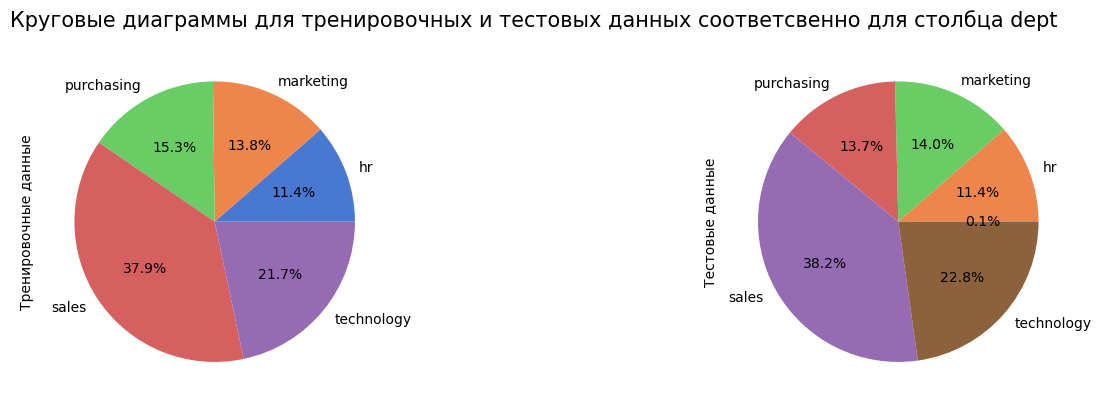

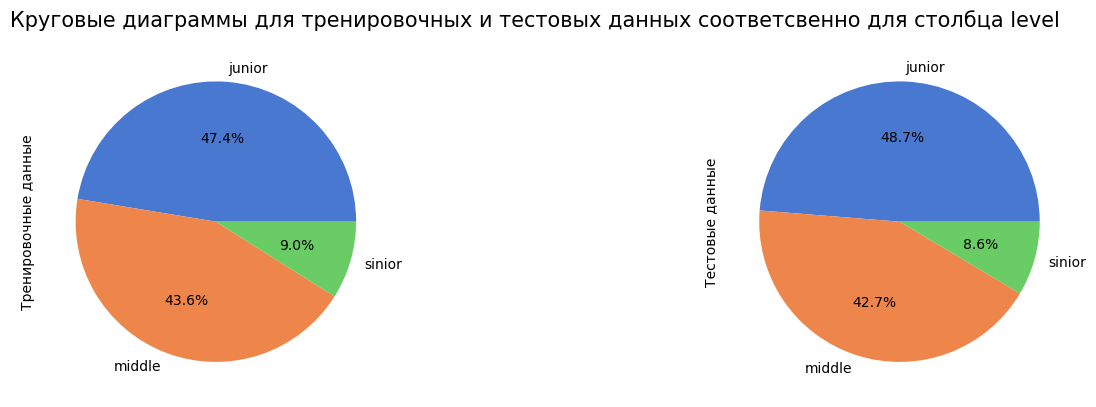

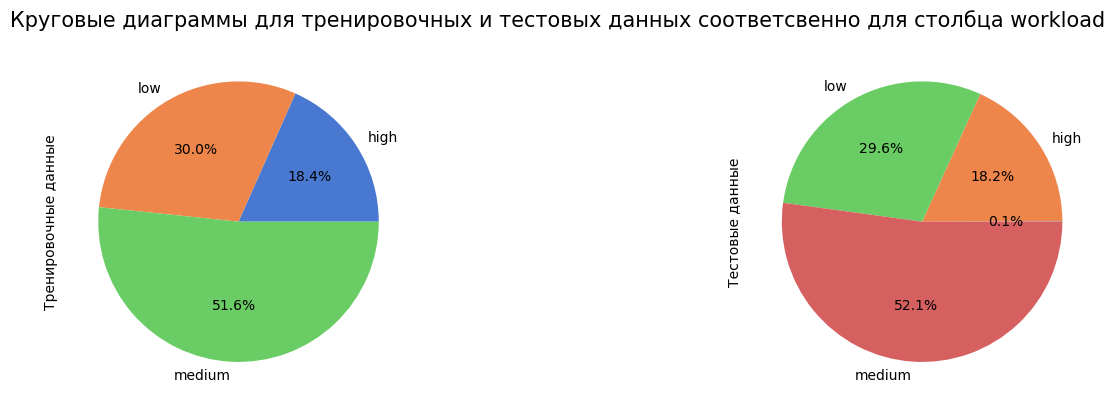

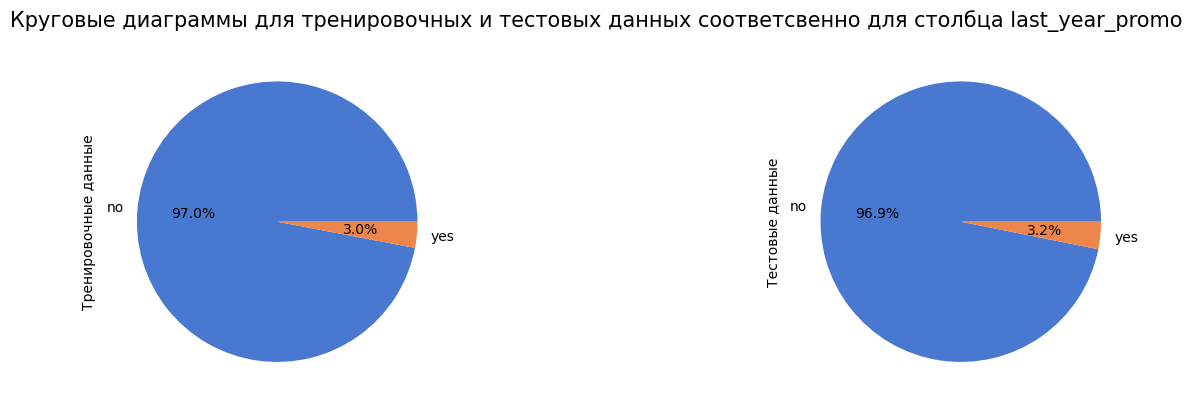

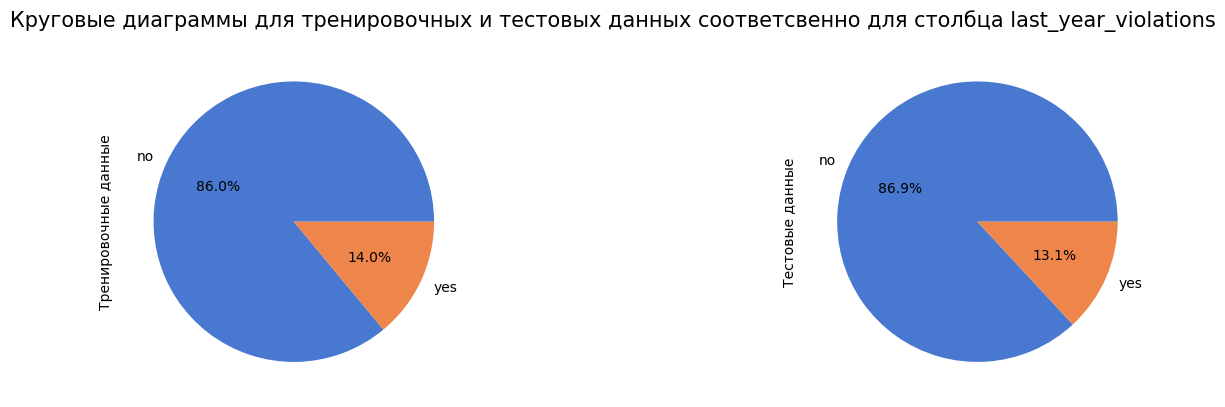

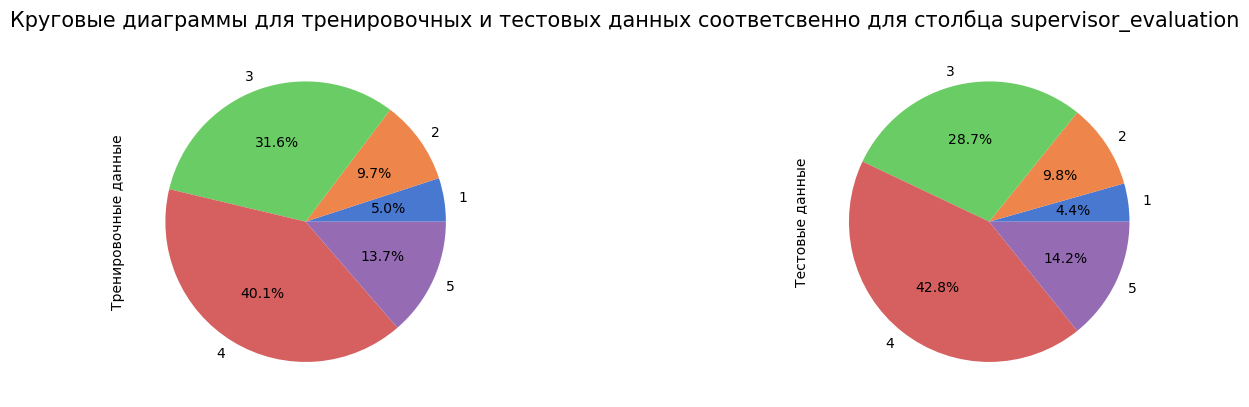

In [16]:
for col in categorical_features_1:
    pies(train_data_1, X_test_1, col, 'id')

**Вывод по категориальным данным**

- dept: Наиболее популярный отдел sales (38%), потом идет technology (22%), далее purchasing (14,5%), marketing (14%), hr (11%). 0.1% это пропущенные значения с пробелом, которые мы будем обрабатывать в пацплайне.
- level: Больше всего junior (48%), чуть меньше middle (42%) и еще примерно 10% senior. Выглядит правдоподобно.
- workload: Больше всего средней загрузки (50%), далее идут низкая и высокая загрузки (30% и 18% соответсвенно).
- last_year_promo: Тлько 3% повышений за прошедший год.
- last_year_violations: 14% сотрудников нарушали трудовой договор за последний год.
- supervisor_evaluation: Больше всего 4ок в оценках качетва работы сотрудников (41%), далее 3ка (30%) и оставшиеся 30% распределены между 5ой 2ой и 1ей (именно в таком порядке процентного соотношения).

Дисбаланс классов отсутсвует и это не может не радовать.

#### Колличесвенные данные

In [17]:
#Функция выводящая гистограмму и диаграмму размаха для колличественных признаков
def hist_box(df, col, hue):
    fig, ax = plt.subplots(1, 2)
    fig.tight_layout(h_pad=1)
    fig.set_figheight(6)
    fig.set_figwidth(14)

    hist_graph = ax[0]
    boxplot_graph = ax[1]
    
    hist_graph.grid(True)
    boxplot_graph.grid(True)
    
    hist_graph.set_title(f'Гистограмма для {col}')
    boxplot_graph.set_title(f'Диаграмма размаха {col}')
    
    hist_graph.set_xlabel(col)
    hist_graph.set_ylabel('Кол-во пользователей')
    
    boxplot_graph.set_xlabel(col)
    
    sns.histplot(df, ax=hist_graph, x=col, bins=10, kde=True, hue=hue)
    sns.boxplot(data=df, ax=boxplot_graph, x=col, y=hue)

    plt.show()

In [18]:
# Объединение всех данных в один датафрейм для анализа
test_data_1_analyze = X_test_1.merge(y_test_1, on='id')
test_data_1_analyze['marker'] = 'test'

train_data_1_analyze = train_data_1.copy()
train_data_1_analyze['marker'] = 'train'

full_data_1_analyze = pd.concat([test_data_1_analyze, train_data_1_analyze])

In [19]:
print('\nТренировочные данные:')
display(train_data_1[quantitative_features_1].describe())
print('\nТестовые данные:')
display(test_data_1_analyze[quantitative_features_1].describe())


Тренировочные данные:


,employment_years,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000
mean,3.718500,33926.700000,0.533995
std,2.542513,14900.703838,0.225327
min,1.000000,12000.000000,0.030000
25%,2.000000,22800.000000,0.360000
50%,3.000000,30000.000000,0.560000
75%,6.000000,43200.000000,0.710000
max,10.000000,98400.000000,1.000000



Тестовые данные:


,employment_years,salary,job_satisfaction_rate
count,2000.000000,2000.000000,2000.00000
mean,3.666500,34066.800000,0.54878
std,2.537222,15398.436729,0.22011
min,1.000000,12000.000000,0.03000
25%,1.000000,22800.000000,0.38000
50%,3.000000,30000.000000,0.58000
75%,6.000000,43200.000000,0.72000
max,10.000000,96000.000000,1.00000


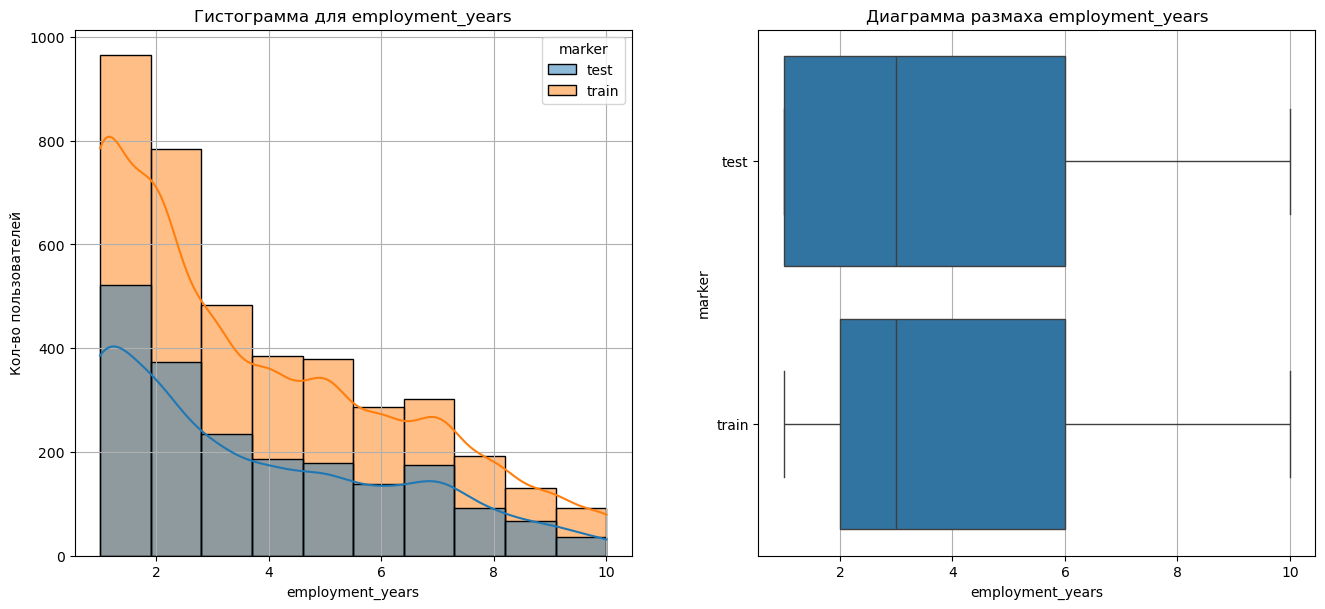

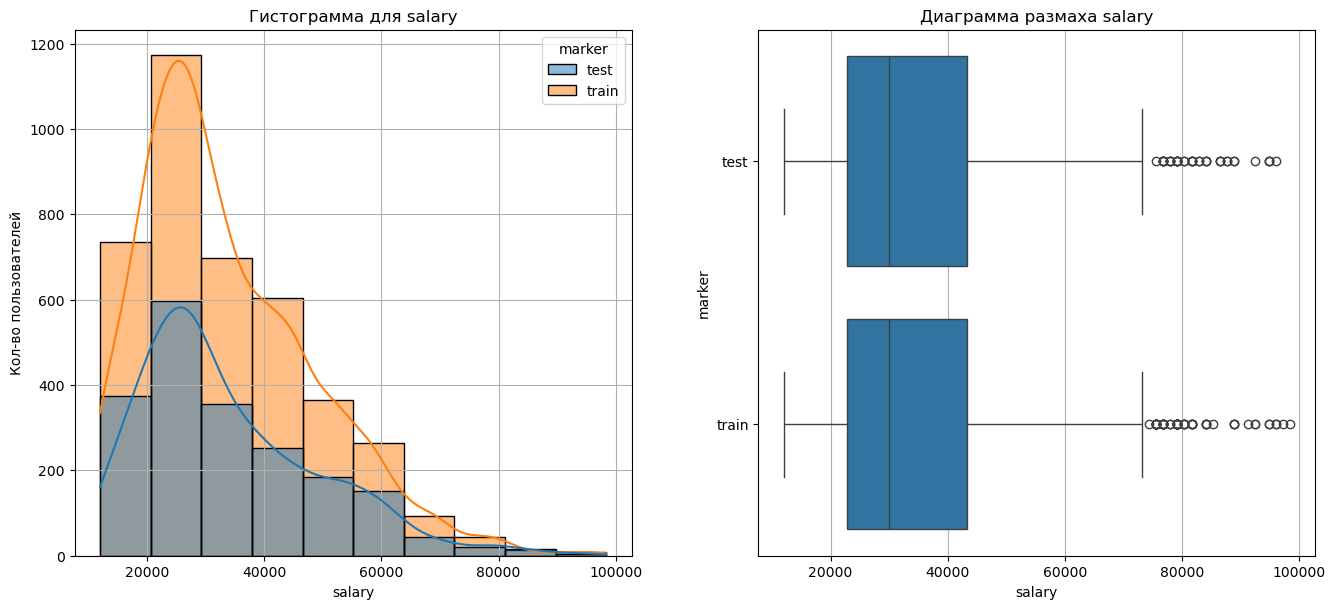

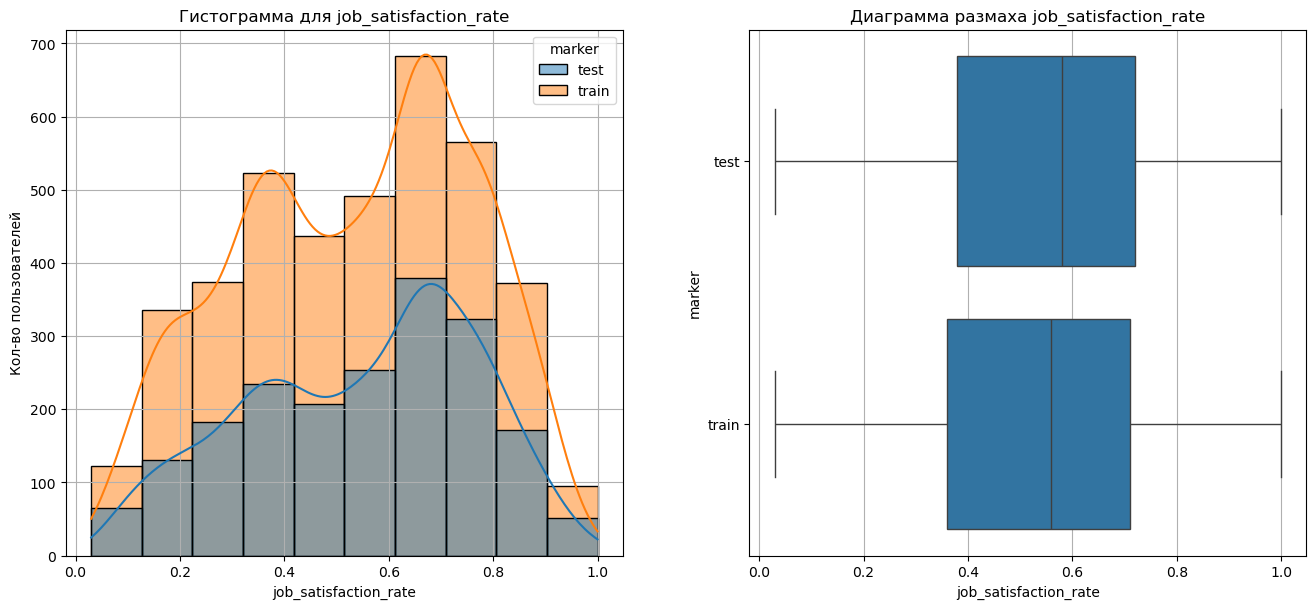

In [20]:
for col in quantitative_features_1:
    hist_box(full_data_1_analyze, col, 'marker')

**Вывод по колличетсвенным признакам**

- employment_years: Распределение выглядит правдоподобно, больше всего у нас сотрудников, которые работают 3 года.
- salary: Распределение выглядит правдоподобно, среднее значние ЗП составляет 34 тыс, медианное 30 тыс, есть группа очень высоких зарплат, выбивающиеся из общей массы, это не выбросы.
- job_satisfaction_rate: Целевой признак. В среднем соотрудники удовлетворены работой в компании примерно на 55%.

#### Корреляционные анализ

Т.к. тренировочные и тестовые данные по всем распредлениям совпадают, матрицу корреляцию будем строить по объединенным данным.

In [21]:
full_data_1_analyze.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,marker
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79,test
1,686555,hr,junior,medium,1,no,no,4,30000,0.72,test
2,467458,sales,middle,low,5,no,no,4,19200,0.64,test
3,418655,sales,middle,low,6,no,no,4,19200,0.60,test
4,789145,hr,middle,medium,5,no,no,5,40800,0.75,test


In [22]:
# Расчет матрицы корреляции
interval_cols = ['salary', 'job_satisfaction_rate']
phik_overview = full_data_1_analyze.drop(['id', 'marker'], axis=1).phik_matrix(interval_cols=interval_cols)

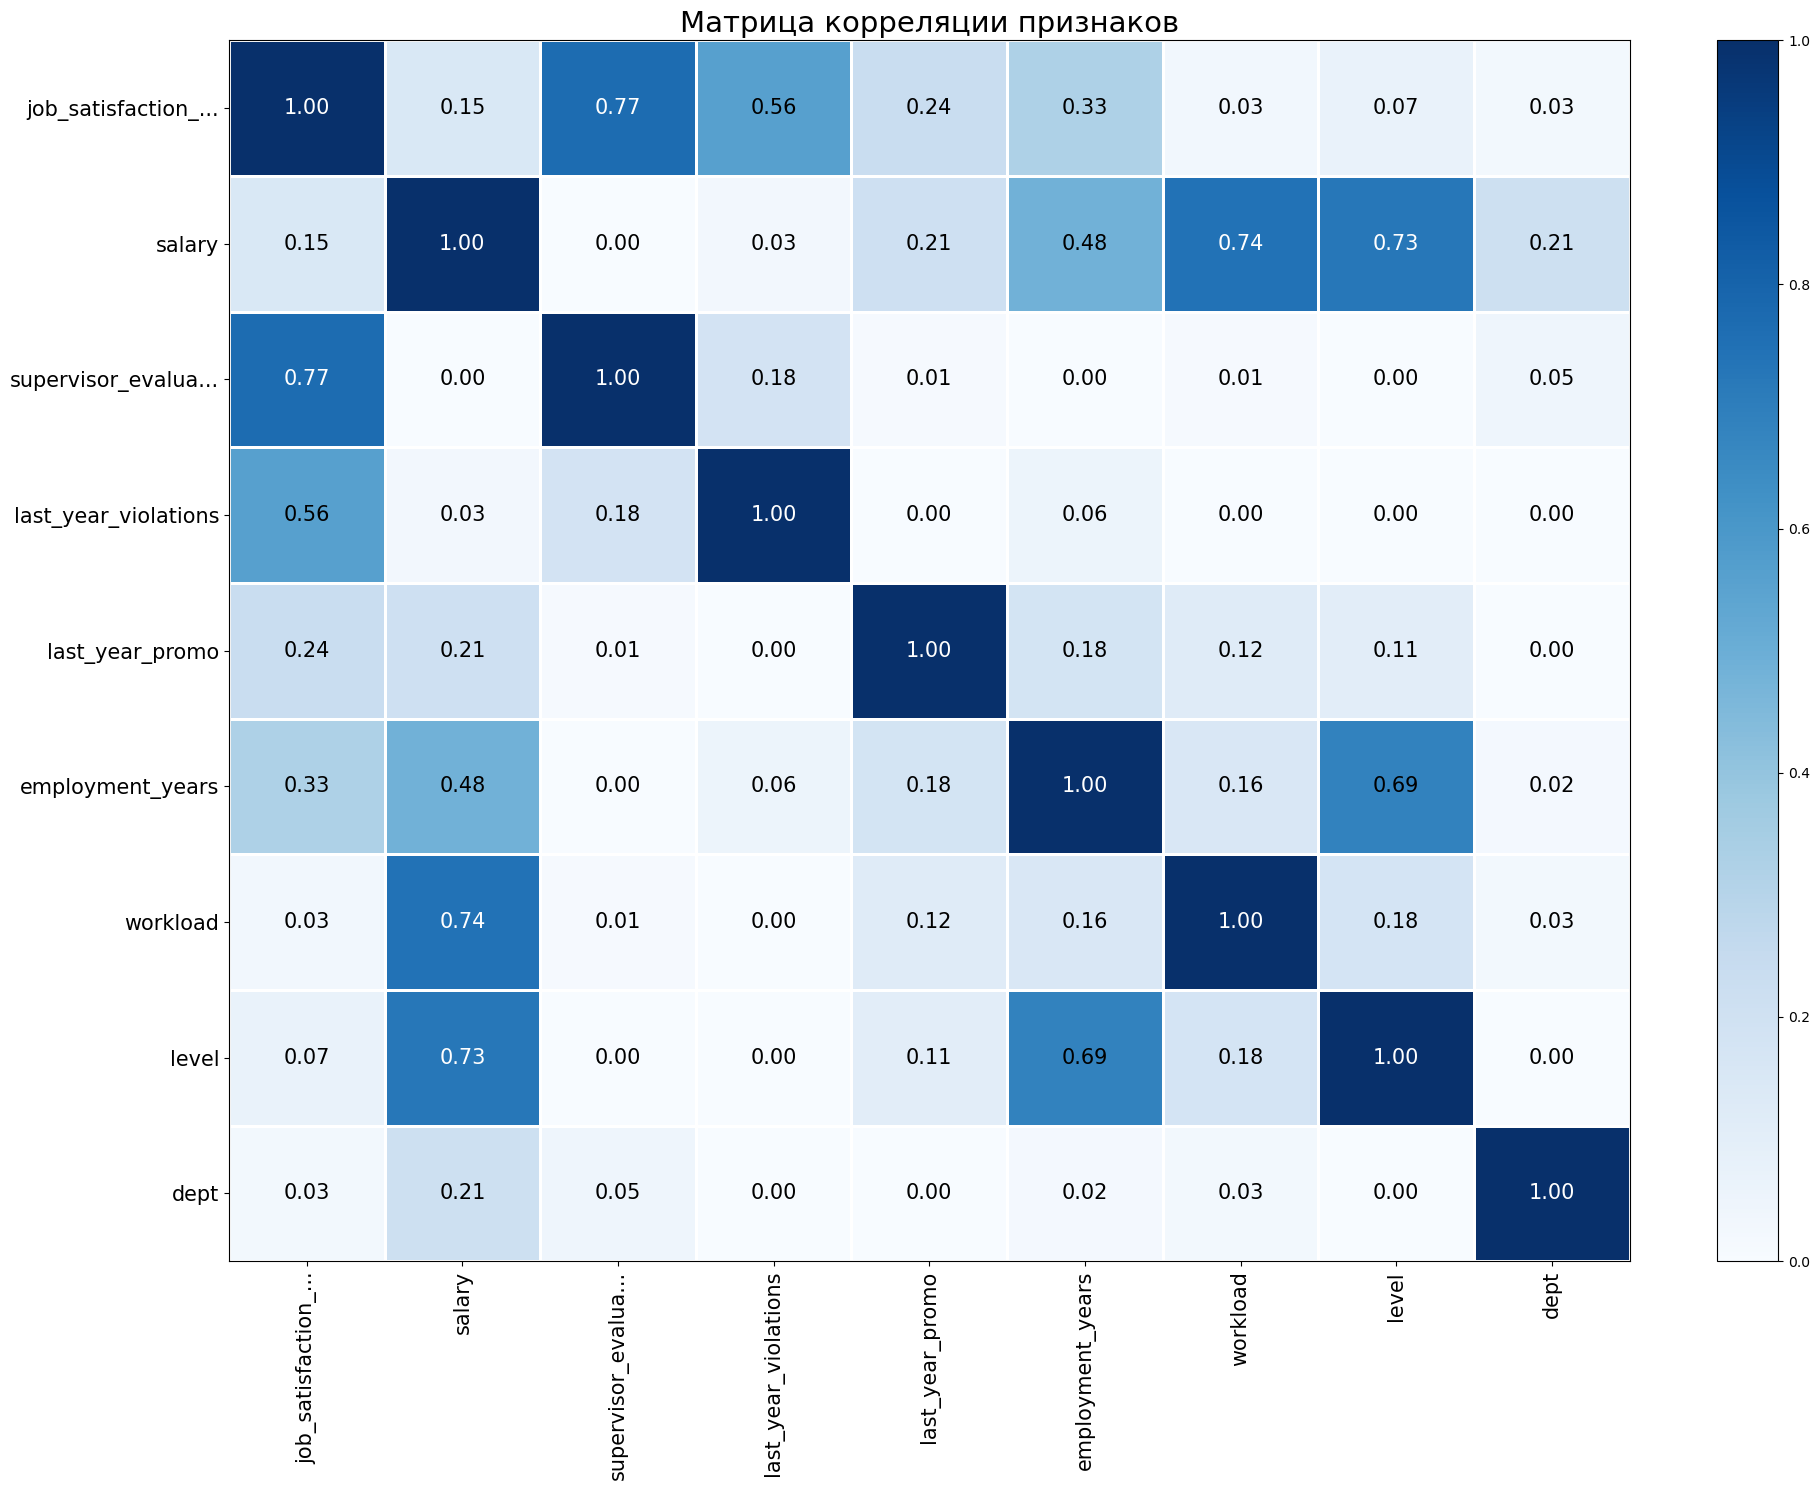

In [23]:
# Построение матрицы корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Blues',
    title='Мaтрица корреляции признаков',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

**Вывод по корреляционному анализу**

Целевой признак job_satisfaction_rate больше всего коррелирует с supervisor_evaluation (0.77) и с last_year_violations (0.56). Далее идут employment_years (0.33), last_year_promo (0.24) и только потом идет salary (0.15). Интересный результат, интуитивно казалось, что самым важным критерием в удовлетворенности сотрудника работой является зарплата, однако самыми важными признаками оказались оценка работы сотрудника его руководителем и нарушение трудового договора сотрудником.

Есть высока корреляция между входными признаками:
- salary сильно коррелирует с workload и level (0.79 и 0.73 соответсвенно), мультиколлинеарности все равно не наблюдается.
- level сильно коррелирует с employment_years (0.69), мультиколлинеарность отсутствует. 

### Подготовка данных
<a id='section_1.4'></a>

#### Подготовка тренировочных и тестовых выборок

In [24]:
train_data_1.set_index('id', inplace=True)
X_test_1.set_index('id', inplace=True)
y_test_1.set_index('id', inplace=True)

In [25]:
X_train_1 = train_data_1.drop('job_satisfaction_rate', axis=1)
y_train_1 = train_data_1['job_satisfaction_rate']

test_data_1 = X_test_1.merge(y_test_1, on='id')
X_test_1 = test_data_1.drop('job_satisfaction_rate', axis=1)
y_test_1 = test_data_1['job_satisfaction_rate']

In [26]:
dfs = [X_train_1, y_train_1, X_test_1, y_test_1]
dfs_names = ['X_train_1', 'y_train_1', 'X_test_1', 'y_test_1']

obvious_duplicates(dfs, dfs_names)

Кол-во явных дубликатов в X_train_1: 1492
Кол-во явных дубликатов в y_train_1: 3902
Кол-во явных дубликатов в X_test_1: 557
Кол-во явных дубликатов в y_test_1: 1902


In [27]:
train_data_1.duplicated().sum()

245

In [28]:
print('\nX_train_1:')
display(X_train_1.head())
print('\ny_train_1:')
display(y_train_1.head())
print('\nX_test_1:')
display(X_test_1.head())
print('\ny_test_1:')
display(y_test_1.head())


X_train_1:


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000
653870,hr,junior,high,2,no,no,5,38400
184592,sales,junior,low,1,no,no,2,12000
171431,technology,junior,low,4,no,no,2,18000
693419,hr,junior,medium,1,no,no,3,22800



y_train_1:


id
155278    0.58
653870    0.76
184592    0.11
171431    0.37
693419    0.20
Name: job_satisfaction_rate, dtype: float64


X_test_1:


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800
686555,hr,junior,medium,1,no,no,4,30000
467458,sales,middle,low,5,no,no,4,19200
418655,sales,middle,low,6,no,no,4,19200
789145,hr,middle,medium,5,no,no,5,40800



y_test_1:


id
485046    0.79
686555    0.72
467458    0.64
418655    0.60
789145    0.75
Name: job_satisfaction_rate, dtype: float64

#### Вывод

На данном этапе были подгототвлены 4 датасета (X_train_1, y_train_1, X_test_1, y_test_1)

Подготовка данных будет происходить внутри пайплайна:

- dept, last_year_promo, last_year_violations - будут кодироваться с помощью OneHotEncoder.
- level, workload - будут кодироваться с помощью OrdinalEncoder.
- employment_years, supervisor_evaluation, salary - будут масштибироваться с помощью StandardScaler, MinMaxScaler, RobustScaler, а так же в пайплайне будет перебираться варианты без масштабирования данных.

### Обучение моделей
<a id='section_1.5'></a>

#### Пайплайн

In [29]:
RANDOM_STATE = 5

# Столбцы для OneHotEncoder()
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']

# Столбцы для OrdinalEncoder()
ord_columns = ['level', 'workload']

#Столбцы для масштабирования
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

# Пайплайн OneHotEncoder()
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
)

# Пайплайн OrdinalEncoder()
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['low', 'medium', 'high'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

# Пайплайн полной подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num',  StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# Итоговый пайплайн
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
    ]
)

In [30]:
# Словарь для перебора моделей и гиперпараметров к ним

param_grid = [
    # словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 30),
        'models__max_features': range(2, 30),
        'models__min_samples_split': range(2, 30),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]

In [31]:
pipe_final

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_befor...
                                                                   OrdinalEncoder(categories=[['junior',
                                                                                               'middle',
                                                                                               'sinior'],
                                                                                              ['low',
                                                                                               'medium',
                                                                                               'high']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload']),
                                                 ('num', StandardScaler(),
                                                  ['employment_years',
                                                   'supervisor_evaluation',
                                                   'salary'])])),
                ('models', DecisionTreeRegressor(random_state=5))])

#### Подбор модели

In [32]:
def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))

smape_scorer = make_scorer(score_func=smape, greater_is_better=False)

In [33]:
# Рандомный поиск наиболее качетвенных моделей и параметров к ним
grid = RandomizedSearchCV(
    pipe_final, 
    param_grid,
    n_iter=30,
    cv=5, 
    scoring=smape_scorer,
    random_state=RANDOM_STATE,
    n_jobs = -1
)
search = grid.fit(X_train_1, y_train_1)

In [34]:
best_model = search.best_estimator_

print('Лучшая модель:')

display(best_model['models'])

print('Метод масштабирования лучшей модели:')

display(search.best_params_['preprocessor__num'])

Лучшая модель:


DecisionTreeRegressor(max_depth=22, max_features=24, min_samples_split=12,
                      random_state=5)

Метод масштабирования лучшей модели:


'passthrough'

In [35]:
res_1 = pd.DataFrame(search.cv_results_)
display(res_1[['rank_test_score', 'mean_test_score', 'param_models', 'params']].sort_values(by='rank_test_score', ascending=True).head(10))
pd.set_option('display.max_colwidth', None)

,rank_test_score,mean_test_score,param_models,params
20,1,-14.729879,DecisionTreeRegressor(random_state=5),"{'preprocessor__num': 'passthrough', 'models__..."
19,2,-14.746514,DecisionTreeRegressor(random_state=5),"{'preprocessor__num': MinMaxScaler(), 'models_..."
11,3,-14.747147,DecisionTreeRegressor(random_state=5),"{'preprocessor__num': RobustScaler(), 'models_..."
6,4,-14.820594,DecisionTreeRegressor(random_state=5),"{'preprocessor__num': StandardScaler(), 'model..."
22,5,-14.871898,DecisionTreeRegressor(random_state=5),"{'preprocessor__num': MinMaxScaler(), 'models_..."
16,6,-14.874385,DecisionTreeRegressor(random_state=5),"{'preprocessor__num': 'passthrough', 'models__..."
23,7,-15.017182,DecisionTreeRegressor(random_state=5),"{'preprocessor__num': RobustScaler(), 'models_..."
10,8,-15.042579,DecisionTreeRegressor(random_state=5),"{'preprocessor__num': StandardScaler(), 'model..."
13,9,-15.051744,DecisionTreeRegressor(random_state=5),"{'preprocessor__num': 'passthrough', 'models__..."
0,10,-15.054667,DecisionTreeRegressor(random_state=5),"{'preprocessor__num': 'passthrough', 'models__..."


In [36]:
# Функция для расчета smape для тренировочной и тестовой выборок
def smape_train_test(model, X_test, y_test, search):

    smape_on_train = search.best_score_
    smape_on_test = smape(y_test, model.predict(X_test))                       
                                                   
    print(f'Метрика smape для тренировочной выборки: {round(smape_on_train, 3)}',
          f'Метрика smape для тестовой выборки: {round(smape_on_test, 3)}', sep='\n')

In [37]:
smape_train_test(best_model, X_test_1, y_test_1, search)

Метрика smape для тренировочной выборки: -14.73
Метрика smape для тестовой выборки: 13.659


C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


#### Вывод

На данном этапе был создан пайплайн, который вмещает в себя этам предобработки данных и этап обучения модели.

1. На этапе предобработки сначала кодируются категориальные признаки с помощью OneHotEncoder, потом категориальные порядковые признаки с помощью OrdinalEncoder, затем происходит масштабирование колличественых данных с помощью StandrdScaler, MinMaxScaler или RobustScaler (происходит перебор).
2. На этапе обучения модели перебираются DecisionTreeRegressor, LinearRegression, так же в каждой модели перебираются некоторыет гиперпараметры.

В итоге была найдена и обучена модель для определения уровня удовлетворенности сотрудника работой. Лучшей по метрике SMAPE оказалась DecisionTreeRegressor(max_depth=22, max_features=24, min_samples_split=12, random_state=5) с масштабированием данных с помощью 'passthrough'.

- Метрика SMAPE лучшей модели для тренировочной выборки: -14.73.

- Метрика SMAPE лучшей модели для тестовой выборки: 13.659.

По техническому заданию: SMAPE <= 15 на тестовой выборке. Условие выполняется, значит задача решена.

### Выводы по первой задаче
<a id='section_1.6'></a>

#### Интерпретация модели

C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


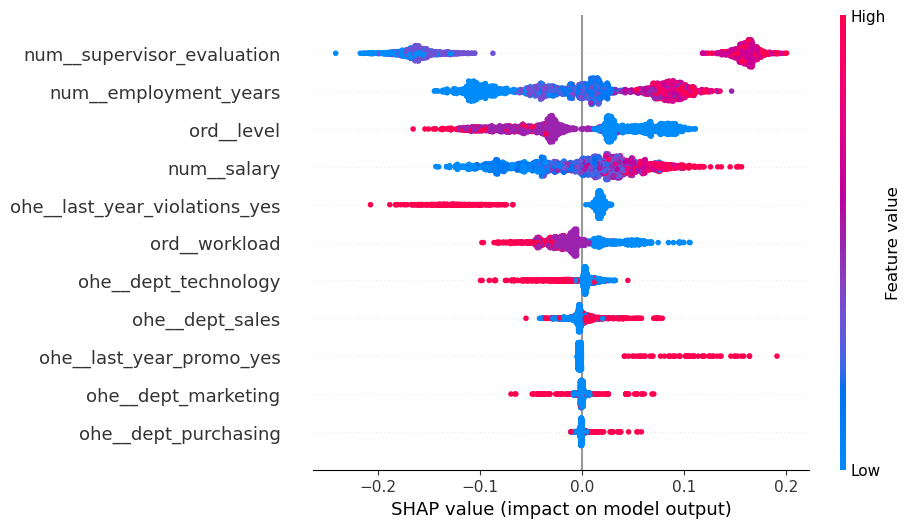

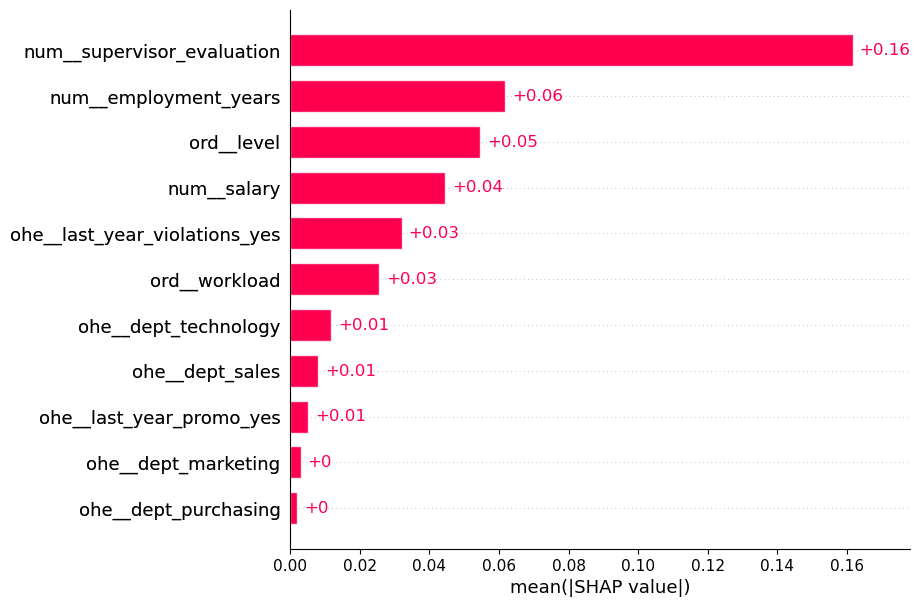

In [38]:
# Предобработанные входные данные
X_train_preprocessed_1 = best_model['preprocessor'].fit_transform(X_train_1)
X_test_preprocessed_1 = best_model['preprocessor'].transform(X_test_1)

# Создание Explainer
explaner = shap.Explainer(best_model['models'], X_train_preprocessed_1)

# Добавление названий столбцов, для более понятных графиков
feature_names_1 = best_model['preprocessor'].get_feature_names_out()
X_test_preprocessed_1 = pd.DataFrame(X_test_preprocessed_1, columns=feature_names_1)

# Нахождение значений Шэпли
shap_values_1 = explaner(X_test_preprocessed_1, check_additivity=False)

#Построение графиков
shap.plots.beeswarm(shap_values_1, max_display=30)
shap.plots.bar(shap_values_1, max_display=30)

#### Вывод

Лучшей моделью для решения поставленной задачи по метрике SMAPE, а именно "Предсказание уровня удовлетворенности сотрудника", оказалась модель DecisionTreeRegressor(max_depth=14, max_features=19, min_samples_split=6, random_state=5) с масштабированием данных с помощью RobustScaler().

Наиболее сильно влияющми на модель признакми оказались (список идет в порядке убывания важности):

1. supervisor_evaluation: Чем выше руководитель оценивает работу сотрудника, тем выше удовлетворенность сотрудника, интерестно, что это самый выжный признак...
2. employment_years: Чем больше сотрудник работает в компании, тем выше его удовлетворенность, звучит логично, вряд ли человек захочет долго работать в месте, где ему не нравится.
3. level: Чем ниже уровень занимаемой должности, тем больше сотрудник удовлетворен работой, забавно :D.
4. salary: Чем выше зарплата, тем больше удовлетворенность, тут все логично.
5. last_year_violation: отсутсвие нарушение не сильно влияет на целевоц признак, однако наличие нарушений сильно влияет в негативную сторону на удовлетворенность сотрудника.
6. workload: Чем меньше загруженность, тем выше удовлетворенность. Звучит здраво, никто не любит перерабатывать.

Все остальные признаки уже имеют весьма слабое влияние, однако стоит отметить, что люди работающие в отделе technology, чаще имеют низкую удовлетворенность, в отделе purchasing все диаметрано наоборот. Также сотрудники, у которых было повышение в последний год имеют более высокую удовлетворенность, что в целом логично.

## Задача №2
<a id='section_2'></a>

**Все рассуждения и выводы в данной задаче будут во многом повторяться с первой задачей, т.к. данные в двух задачах примерно одинаковые (X_test вообще один и тот же датафрем в обеих задачах).**

**Цель:**

Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

**Описание данных:**

1. train_quit.csv - тренировочные данные (X_train + y_train).
2. test_features.csv - входные данные для тестов (X_test).
3. test_target_quit.csv - целевой признак тестовой выборки (y_test).

Признаки:

- quit - Целевой признак, факт увольнение сотрудника из компании.

Входные признаки такие же как и в первой задаче.

**План выполнения задачи:**
    
2.1 [Загрузка данных](#section_2.1)
    
2.2 [Предобработка данных](#section_2.2)
    
2.3 [Исследовательский анализ данных](#section_2.3)
 
2.4 [Добавление нового входного признака](#section_2.4)
    
2.5 [Подготовка данных](#section_2.5)
    
2.6 [Обучение моделей](#section_2.6)
    
2.7 [Выводы по первой задаче](#section_2.7)

### Загрузка данных
<a id='section_2.1'></a>

In [39]:
train_data_2 = pd.read_csv('train_quit.csv')
X_test_2 = pd.read_csv('test_features.csv')
y_test_2 = pd.read_csv('test_target_quit.csv')

In [40]:
info_head(train_data_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
5,699916,sales,junior,low,1,no,yes,3,18000,yes
6,417070,technology,middle,medium,8,no,no,2,44400,no
7,165489,sales,middle,low,4,no,no,5,19200,no
8,996399,marketing,middle,low,7,no,no,4,25200,no
9,613206,technology,middle,medium,2,no,no,3,45600,yes


In [41]:
info_head(X_test_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
5,429973,purchasing,middle,medium,6,no,no,3,42000
6,850699,technology,junior,medium,3,no,no,3,26400
7,500791,sales,middle,high,9,no,no,4,49200
8,767867,marketing,middle,high,3,no,yes,4,62400
9,937235,sales,junior,medium,1,no,yes,3,26400


In [42]:
info_head(y_test_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes
5,223063,no
6,810370,no
7,998900,no
8,578329,no
9,648850,no


#### Вывод

Загрузили три датафрейма:

1. train_data_1 (train_job_satisfaction_rate.csv): пропусков нет.

2. X_test_1 (test_features.csv): имеются пропуски в debt и level (2 и 1 пропуска соответсвенно).

3. y_test_1 (test_target_job_satisfaction_rate.csv): пропусков нет.

Типы данных во всех датафреймах в порядке.

Категориальные данные: id, dept, level, workload, last_year_promo, last_year_violations, supervisor_evaluation, quit.

Колличесвенные данные: employment_years, salary.

### Предобработка данных
<a id='section_2.2'></a>

#### Поиск и устранение неявных дубликатов

In [43]:
categorical_features_2 = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations',
                          'supervisor_evaluation', 'quit']

quantitative_features_2 = ['employment_years', 'salary']

In [44]:
unique_values(train_data_2, categorical_features_2)

Уникальные значения столбца(ов):

dept: ['sales' 'purchasing' 'marketing' 'technology' 'hr']
level: ['middle' 'junior' 'sinior']
workload: ['high' 'medium' 'low']
last_year_promo: ['no' 'yes']
last_year_violations: ['no' 'yes']
supervisor_evaluation: [4 1 3 5 2]
quit: ['no' 'yes']


In [45]:
cols = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'supervisor_evaluation']

unique_values(X_test_2, cols)

Уникальные значения столбца(ов):

dept: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
level: ['junior' 'middle' 'sinior' nan]
workload: ['medium' 'low' 'high' ' ']
last_year_promo: ['no' 'yes']
last_year_violations: ['no' 'yes']
supervisor_evaluation: [5 4 3 1 2]


В X_test_2 есть пропущенные значения, которые не имеют значение nan.

In [46]:
X_test_2['dept'] = X_test_2['dept'].replace(' ', np.nan)
X_test_2['workload'] = X_test_2['workload'].replace(' ', np.nan)

In [47]:
unique_values(y_test_2, ['quit'])

Уникальные значения столбца(ов):

quit: ['yes' 'no']


#### Поиск и устранение явных дубликатов

In [48]:
dfs = [train_data_2, X_test_2]
dfs_names = ['train_data_2', 'X_test_2']

obvious_duplicates(dfs, dfs_names)

Кол-во явных дубликатов в train_data_2: 0
Кол-во явных дубликатов в X_test_2: 0


In [49]:
X_test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1997 non-null   object
 2   level                  1999 non-null   object
 3   workload               1999 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


#### Вывод

Были устраненены пропуски в данных (просто пробел) в столбцах dept и workload на np.nan в X_test_2.

В будущем значения nan будут заменять с помощью SimpleImputer на этапе подготовки данных внутри пайплайна.

### Исследовательский аналих данных
<a id='section_2.3'></a>

In [50]:
test_data_2 = X_test_2.merge(y_test_2, on = 'id')

#### Категориальные признаки

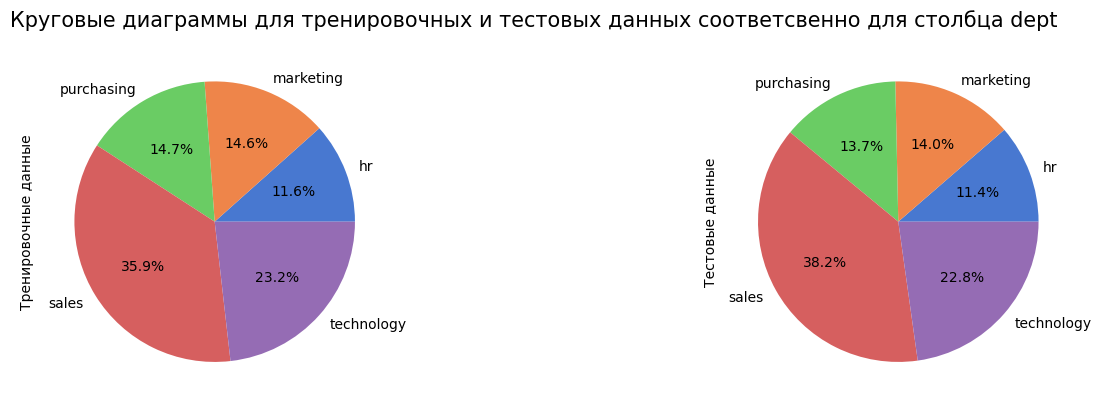

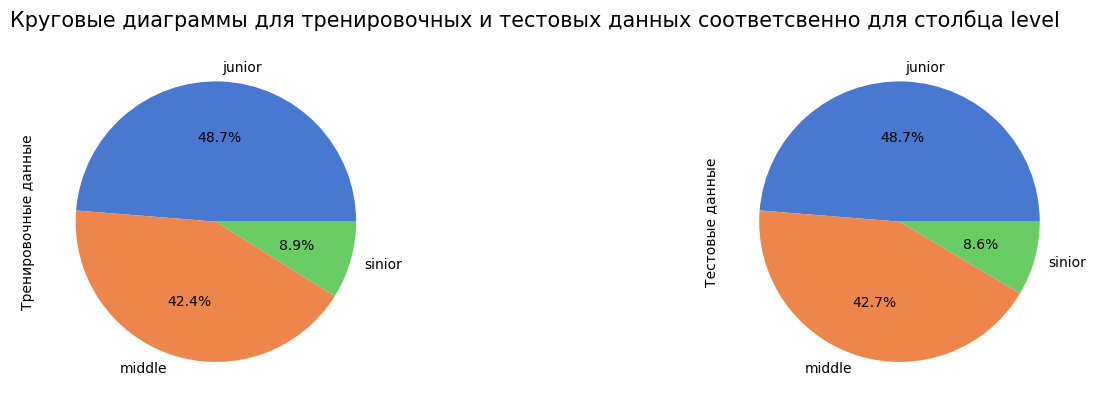

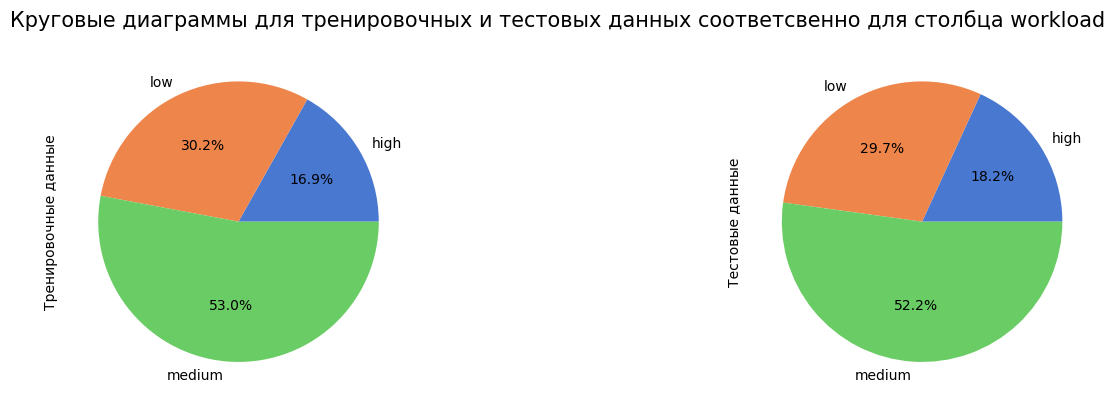

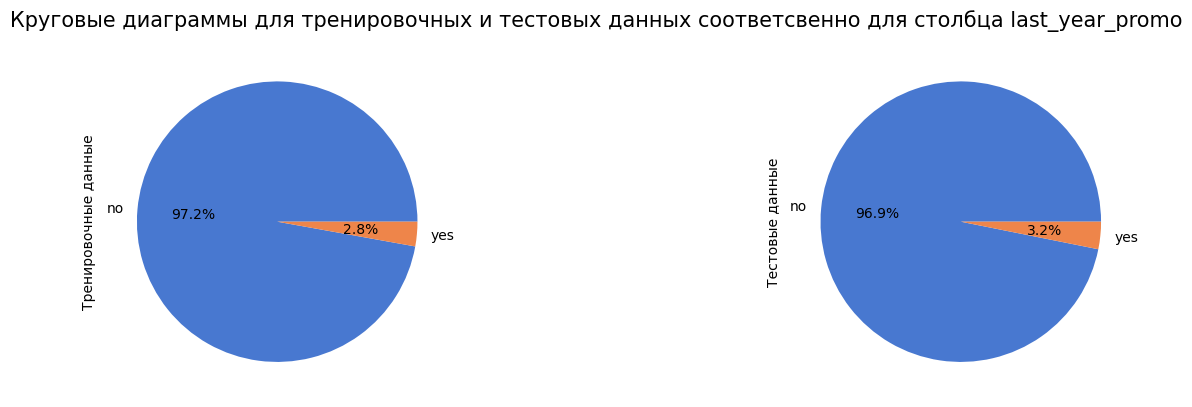

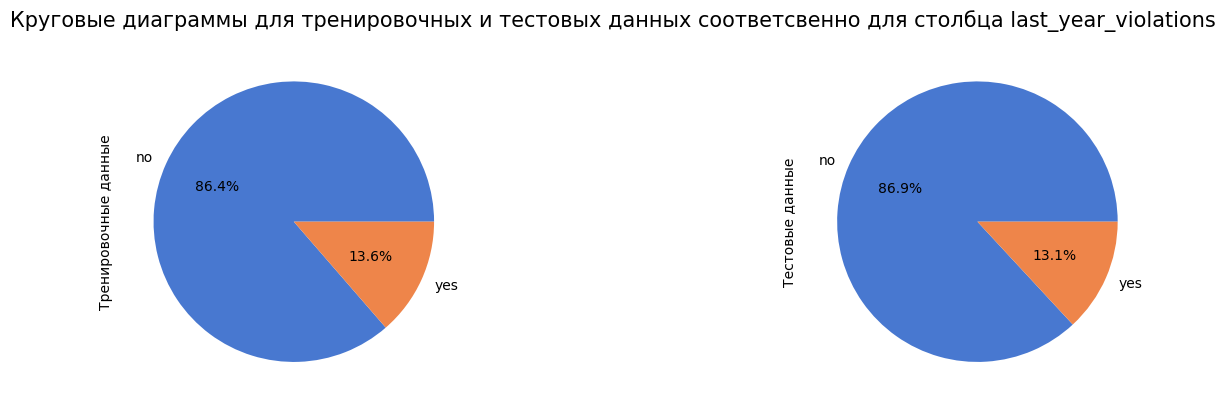

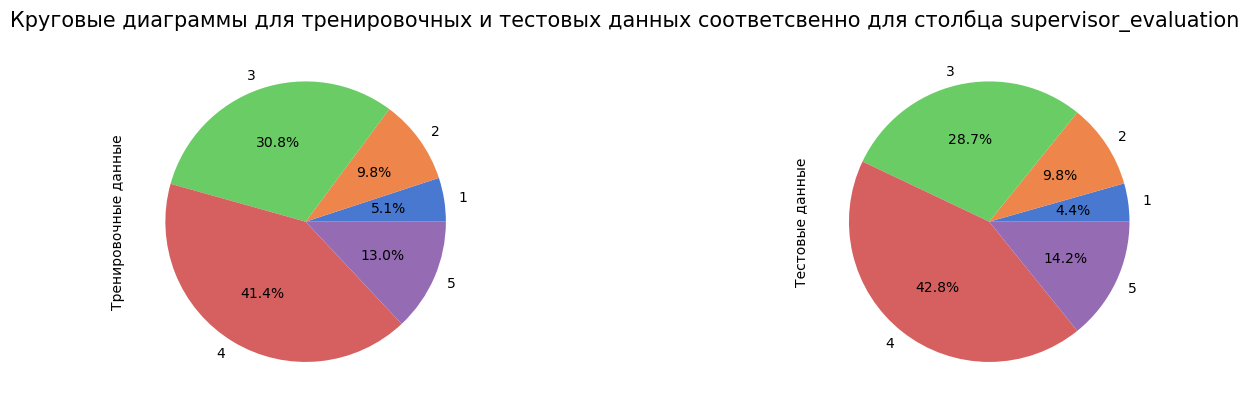

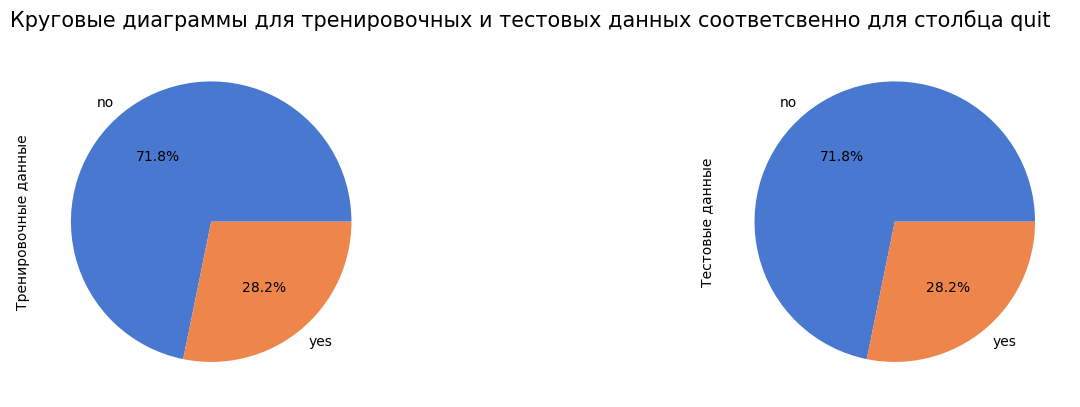

In [51]:
for col in categorical_features_2:
    pies(train_data_2, test_data_2, col, 'id')

**Вывод по категориальным данным**

- dept: Наиболее популярный отдел sales (37%), потом идет technology (23%), далее purchasing (14%) и marketing (14%), hr (11%).
- level: Больше всего junior (48%), чуть меньше middle (42%) и еще примерно 9% senior. Выглядит правдоподобно.
- workload: Больше всего средней загрузки (52%), далее идут низкая и высокая загрузки (30% и 18% соответсвенно).
- last_year_promo: Только 3% повышений за прошедший год.
- last_year_violations: 13% сотрудников нарушали трудовой договор за последний год.
- supervisor_evaluation: Больше всего 4ок в оценках качетва работы сотрудников (42%), далее 3ка (30%) и оставшиеся 30% распределены между 5ой 2ой и 1ей (именно в таком порядке процентного соотношения).
- quit: Почти 30% сотрудников в датафреймах уволилось.

Дисбаланс классов отсутсвует и это не может не радовать.

#### Колличественные признаки

In [52]:
print('\nТренировочные данные:')
display(train_data_2[quantitative_features_2].describe())
print('\nТестовые данные:')
display(test_data_2[quantitative_features_2].describe())


Тренировочные данные:


,employment_years,salary
count,4000.000000,4000.000000
mean,3.701500,33805.800000
std,2.541852,15152.415163
min,1.000000,12000.000000
25%,2.000000,22800.000000
50%,3.000000,30000.000000
75%,6.000000,43200.000000
max,10.000000,96000.000000



Тестовые данные:


,employment_years,salary
count,2000.000000,2000.000000
mean,3.666500,34066.800000
std,2.537222,15398.436729
min,1.000000,12000.000000
25%,1.000000,22800.000000
50%,3.000000,30000.000000
75%,6.000000,43200.000000
max,10.000000,96000.000000


In [53]:
# Объединение всех данных в один датафрейм для анализа
test_data_2_analyze = test_data_2.copy()
test_data_2_analyze['marker'] = 'test'

train_data_2_analyze = train_data_2.copy()
train_data_2_analyze['marker'] = 'train'

full_data_2_analyze = pd.concat([test_data_2_analyze, train_data_2_analyze])

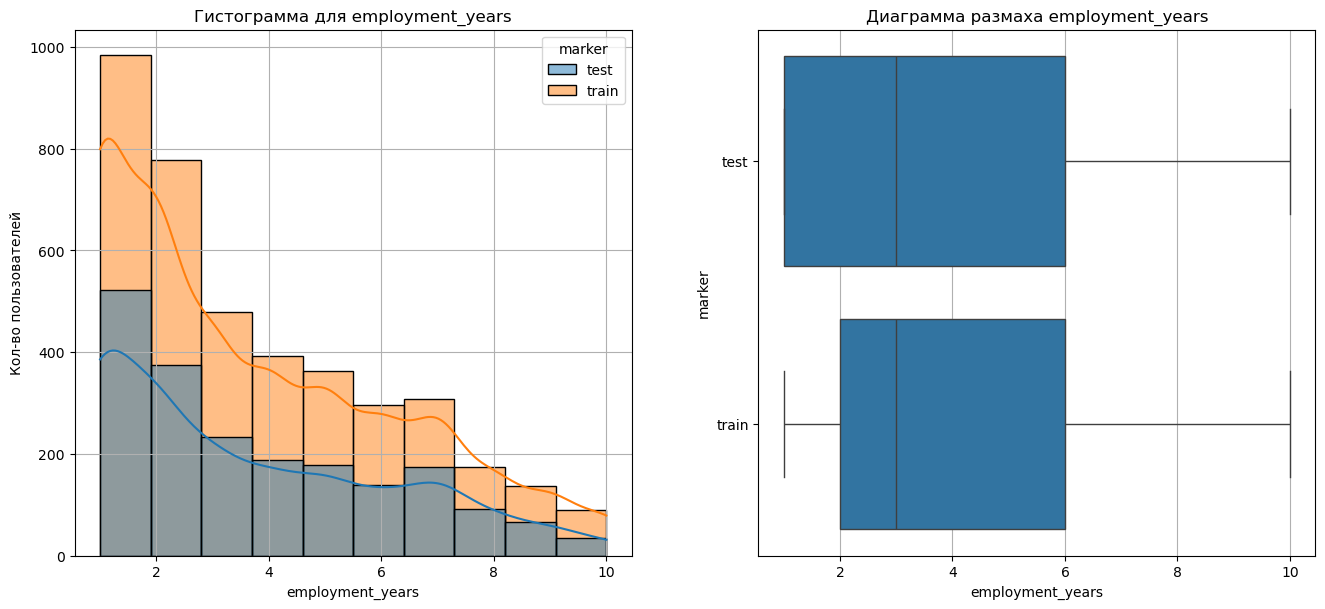

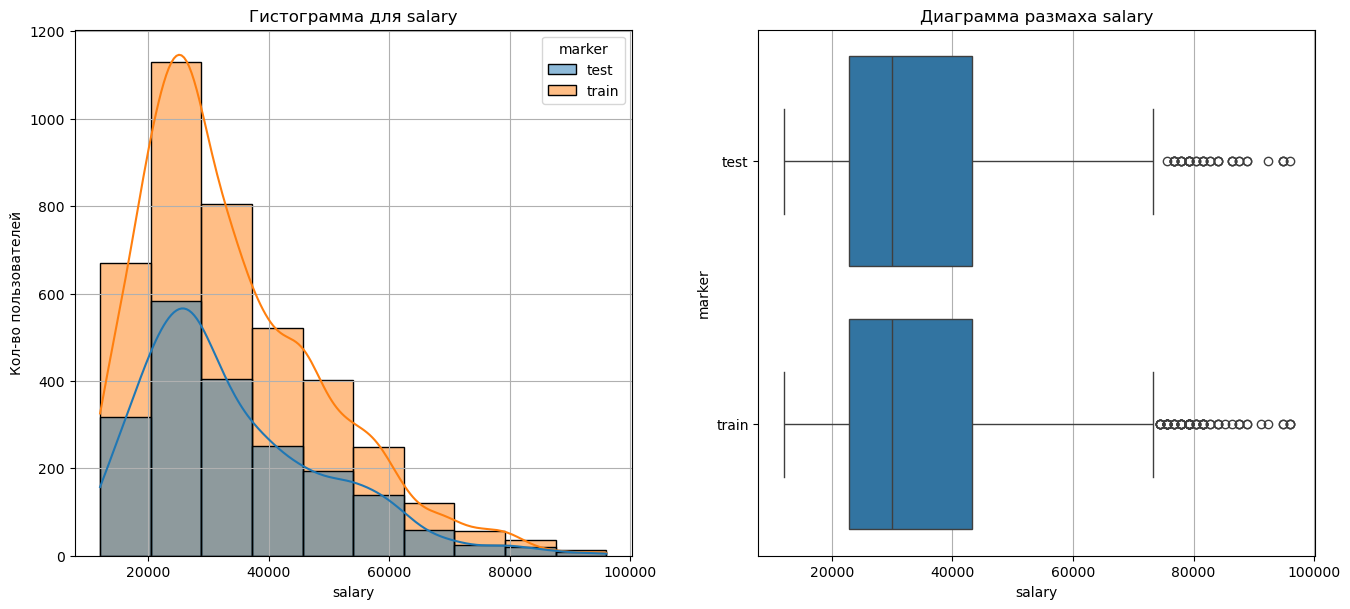

In [54]:
for col in quantitative_features_2:
    hist_box(full_data_2_analyze, col, 'marker')

**Вывод по колличетсвенным признакам**

- employment_years: Распределение выглядит правдоподобно, больше всего у нас сотрудников, которые работают 3 года.
- salary: Распределение выглядит правдоподобно, среднее значние ЗП составляет 34 тыс, медианное 30 тыс, есть группа очень высоких зарплат, выбивающиеся из общей массы, это не выбросы.

#### Исследования связи между удовлетворенностью сотрудников и их увольнениями

Входные признаки у тестовых данных в обоих задачах одинаковы, можем этим воспользоваться и исследовать связь удовлетворенности сотрудников и увольнениями.

In [55]:
quit_job_satisfaction_rate_df = y_test_2.merge(y_test_1, on='id')
info_head(quit_job_satisfaction_rate_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   quit                   2000 non-null   object 
 2   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 47.0+ KB


,id,quit,job_satisfaction_rate
0,999029,yes,0.35
1,372846,no,0.21
2,726767,no,0.73
3,490105,no,0.62
4,416898,yes,0.57
5,223063,no,0.75
6,810370,no,0.65
7,998900,no,0.57
8,578329,no,0.60
9,648850,no,0.79


In [56]:
print('Медианное значение удовлетворенности для ушедших сотрудников:',
      quit_job_satisfaction_rate_df.query("quit == 'yes'")['job_satisfaction_rate'].median())
print('Медианное значение удовлетворенности для оставшихся сотрудников:',
      quit_job_satisfaction_rate_df.query("quit == 'no'")['job_satisfaction_rate'].median())

Медианное значение удовлетворенности для ушедших сотрудников: 0.37
Медианное значение удовлетворенности для оставшихся сотрудников: 0.66


In [57]:
#Функция выводящая гистограмму и диаграмму размаха для колличественных признаков
def hist_box_with_density(df, col, hue):
    fig, ax = plt.subplots(1, 2)
    fig.tight_layout(h_pad=1)
    fig.set_figheight(6)
    fig.set_figwidth(14)

    hist_graph = ax[0]
    boxplot_graph = ax[1]
    
    hist_graph.grid(True)
    boxplot_graph.grid(True)
    
    hist_graph.set_title(f'Гистограмма для {col}')
    boxplot_graph.set_title(f'Диаграмма размаха {col}')
    
    hist_graph.set_xlabel(col)
    hist_graph.set_ylabel('Кол-во пользователей')
    
    boxplot_graph.set_xlabel(col)
    
    sns.histplot(df, ax=hist_graph, x=col, bins=10, kde=True, hue=hue, stat='density', common_norm=False)
    sns.boxplot(data=df, ax=boxplot_graph, x=col, y=hue)

    plt.show()

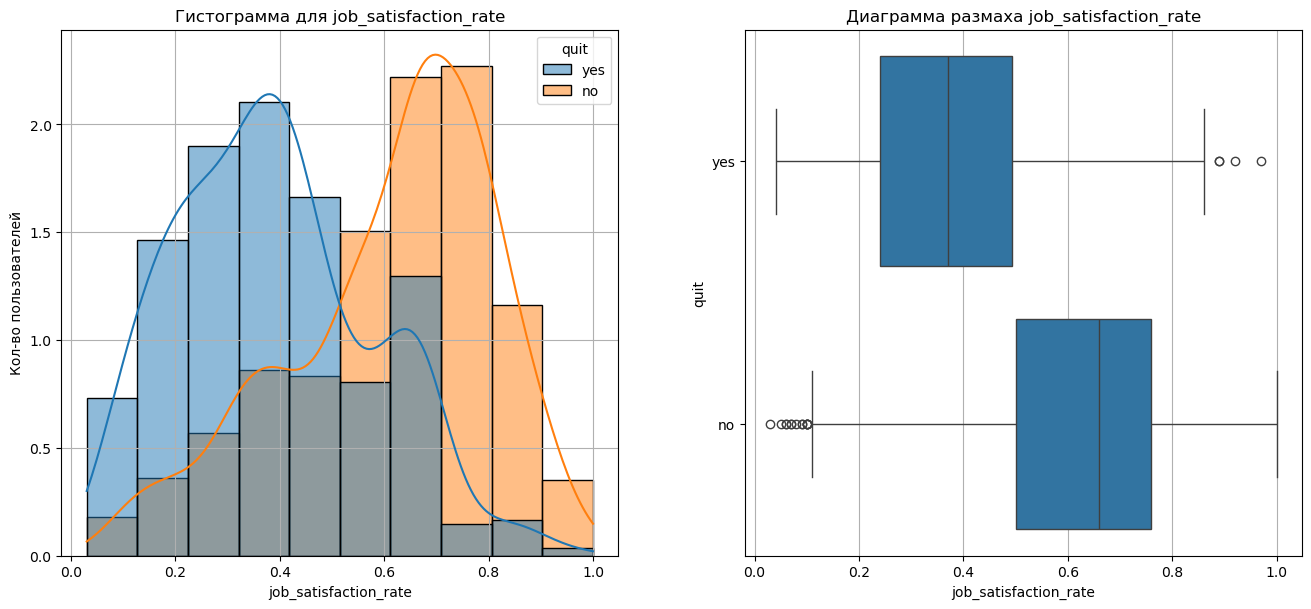

In [58]:
hist_box_with_density(quit_job_satisfaction_rate_df, 'job_satisfaction_rate', 'quit')

**Вывод по связи между удовлетворенностью и увольнениями**

Связь между удовлетворенностью и увольнениями явно присутсвует. Поэтому в модели, предсказывающей увольнения, будем использовать ноывй признак: job_satisfaction_rate.

#### Составление портрета ушедших сотрудников

In [59]:
full_data_2 = pd.concat([train_data_2, test_data_2])

full_data_2_no = full_data_2.query("quit == 'no'")
full_data_2_yes = full_data_2.query("quit == 'yes'")

In [60]:
def pies_quit(df, group):
    grouped_data = full_data_2.groupby([group])['quit'].value_counts(normalize=True)
    
    filtered_list = list(filter(lambda x: x is not np.nan, df[group].unique()))
    
    fig, axes = plt.subplots(nrows=1, ncols=len(filtered_list), figsize=(16, 5))
    
    plt.suptitle(f'Увольнения по {group}')
    plt.subplots_adjust(top=0.83)
    
    i=0
    for cat in filtered_list:
        grouped_data.loc[grouped_data.index.get_level_values(0) == cat].plot(
            kind='pie', y='quit', autopct='%1.1f%%', ax = axes[i], colors=sns.color_palette('muted'),
            title=f'{group}({cat})', explode=(0, 0.1), startangle=90)
        i += 1
    for ax in axes:
        ax.set_ylabel('')
    plt.show()
        

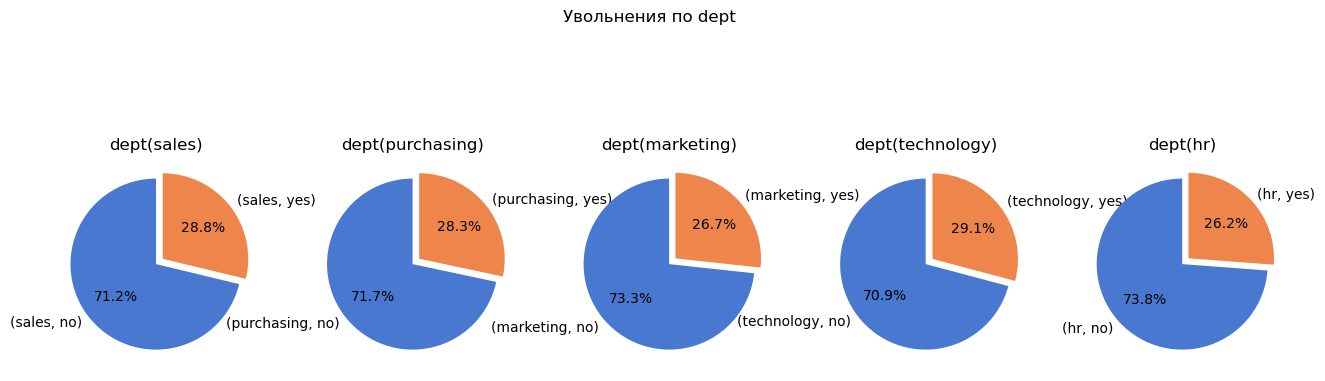

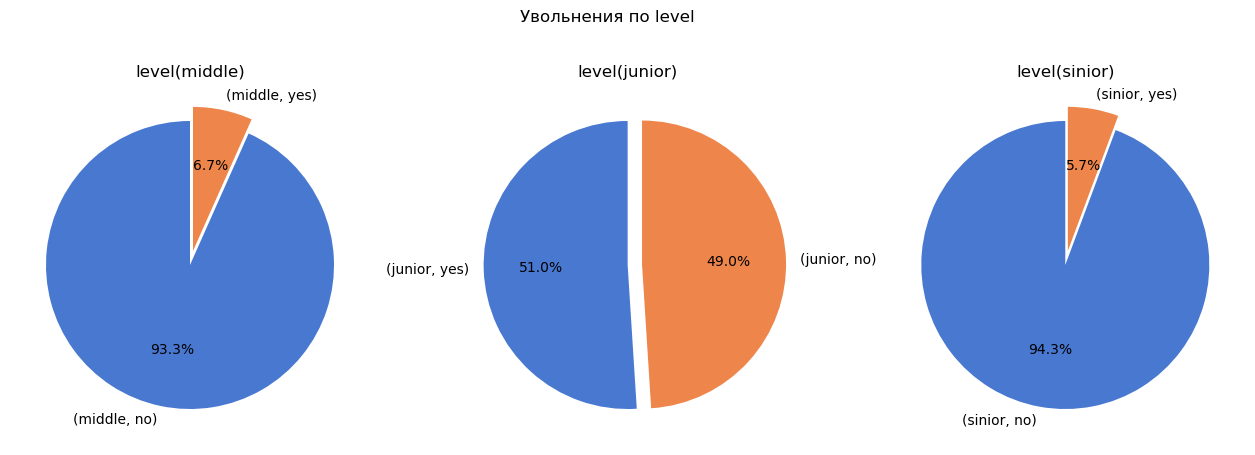

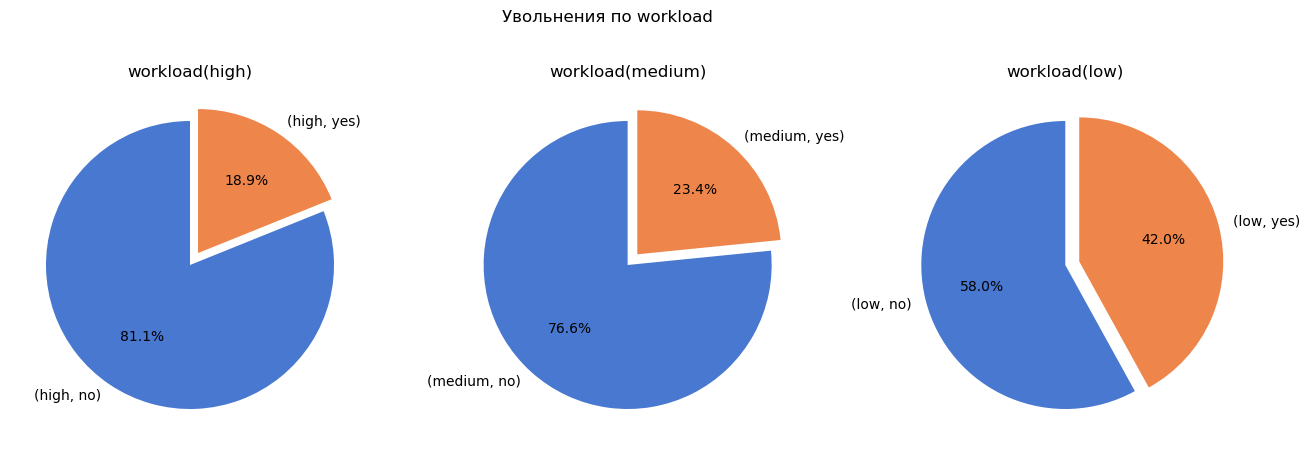

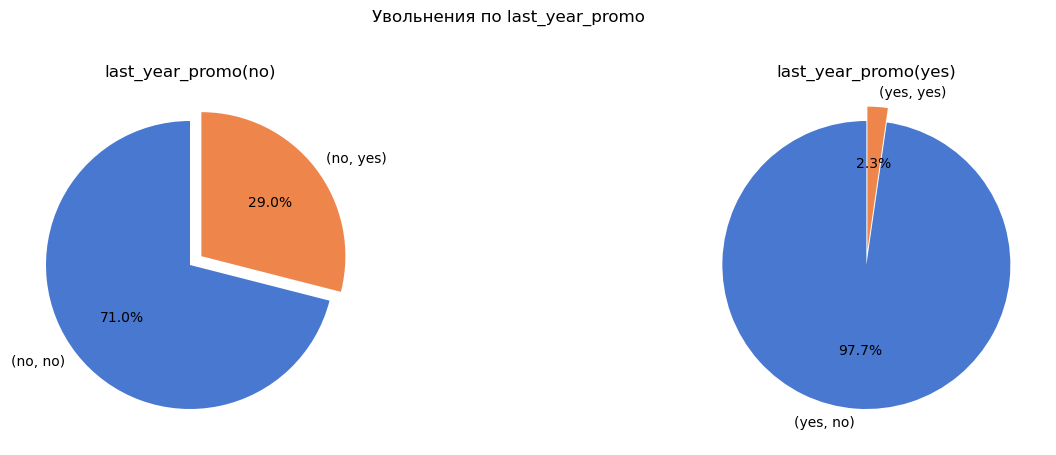

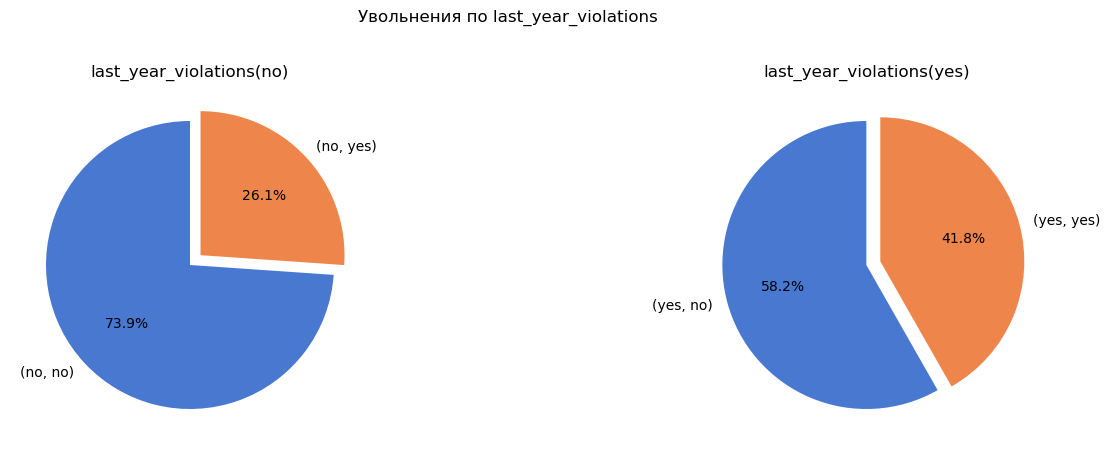

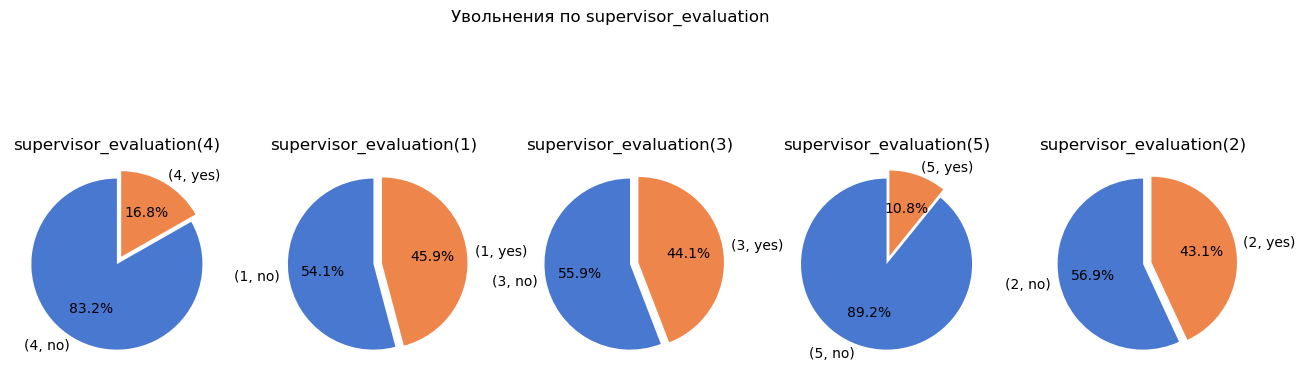

In [61]:
cols = ['dept', 'level','workload', 'last_year_promo', 'last_year_violations', 'supervisor_evaluation']
for cat in cols:
    pies_quit(full_data_2, cat)

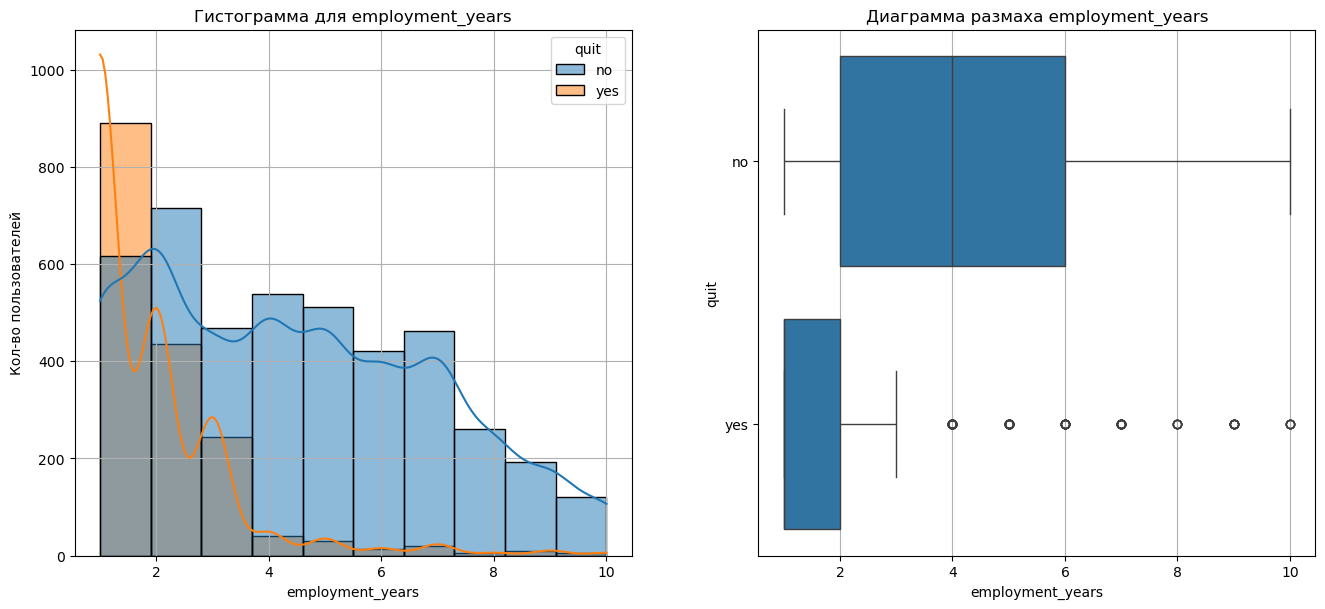

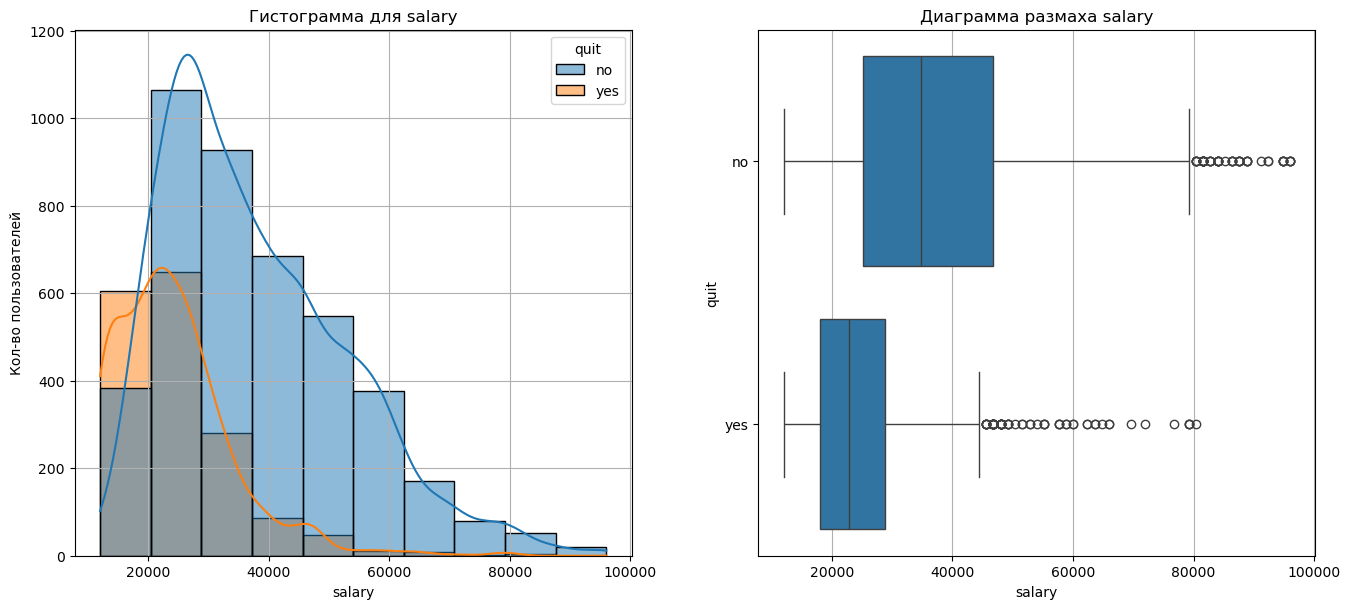

In [62]:
for col in quantitative_features_2:
    hist_box(full_data_2, col, 'quit')

**Итоговый портрет уволившегося сотрудника**

1. Имеет низкую удовлетворенность (меньше 50%).
2. Отдел почти не влияет, немного чаще увольняются из отделов sales и technology. Можно сказать, что влияние данного признака стремится к нулю.
3. Обычно увольняются сотрудники, работающие на позиции junior.
4. Низкая рабочая нагрузка.
5. В прошедший год не было повышений.
6. Чаще нарушает трудовой договор.
7. Оценка руководителя чаще будет меньше или равна 3ем, в 25% случаев увольняются и люди с оценкой 4. С 5ой увольняются крайне редко.
8. Недавно работает (до 2ух лет).
9. Зарплата до 30 тыс, в более редких случаях до 40 тыс.

### Добавление нового входного признака
<a id='section_2.4'></a>

Добавим job_satisfaction_rate в тестовые и тренировочные данные как предсказание первой модели.

#### Добавление job_satisfaction_rate в данные

In [63]:
train_data_2['job_satisfaction_rate'] = best_model.predict(train_data_2)

test_data_2['job_satisfaction_rate'] = best_model.predict(test_data_2)

print('\nТренировочные данные:\n')
info_head(train_data_2)
print('\nТестовые данные:\n')
info_head(test_data_2)


Тренировочные данные:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   4000 non-null   object 
 2   level                  4000 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   quit                   4000 non-null   object 
 10  job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 343.9+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.648000
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.826111
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.340000
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.340000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.690000
5,699916,sales,junior,low,1,no,yes,3,18000,yes,0.111667
6,417070,technology,middle,medium,8,no,no,2,44400,no,0.336364
7,165489,sales,middle,low,4,no,no,5,19200,no,0.463333
8,996399,marketing,middle,low,7,no,no,4,25200,no,0.850000
9,613206,technology,middle,medium,2,no,no,3,45600,yes,0.351111



Тестовые данные:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   1997 non-null   object 
 2   level                  1999 non-null   object 
 3   workload               1999 non-null   object 
 4   employment_years       2000 non-null   int64  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   int64  
 8   salary                 2000 non-null   int64  
 9   quit                   2000 non-null   object 
 10  job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,no,0.883333
1,686555,hr,junior,medium,1,no,no,4,30000,no,0.682222
2,467458,sales,middle,low,5,no,no,4,19200,no,0.660000
3,418655,sales,middle,low,6,no,no,4,19200,no,0.666000
4,789145,hr,middle,medium,5,no,no,5,40800,no,0.825556
5,429973,purchasing,middle,medium,6,no,no,3,42000,yes,0.656000
6,850699,technology,junior,medium,3,no,no,3,26400,yes,0.346667
7,500791,sales,middle,high,9,no,no,4,49200,no,0.648000
8,767867,marketing,middle,high,3,no,yes,4,62400,no,0.360000
9,937235,sales,junior,medium,1,no,yes,3,26400,yes,0.182500


#### Корреляционный анализ

Матрицу корреляции будем вычислять, для тестовых данных.

In [64]:
# Преобразование целевого признака в бинарный (1 и 0)
train_data_2['quit'] = train_data_2['quit'].apply(lambda x: 1 if x == 'yes' else 0)
test_data_2['quit'] = test_data_2['quit'].apply(lambda x: 1 if x == 'yes' else 0)

In [65]:
# Расчет матрицы корреляции
interval_cols = ['salary', 'job_satisfaction_rate']
phik_overview = test_data_2.drop(['id'], axis=1).phik_matrix(interval_cols=interval_cols)

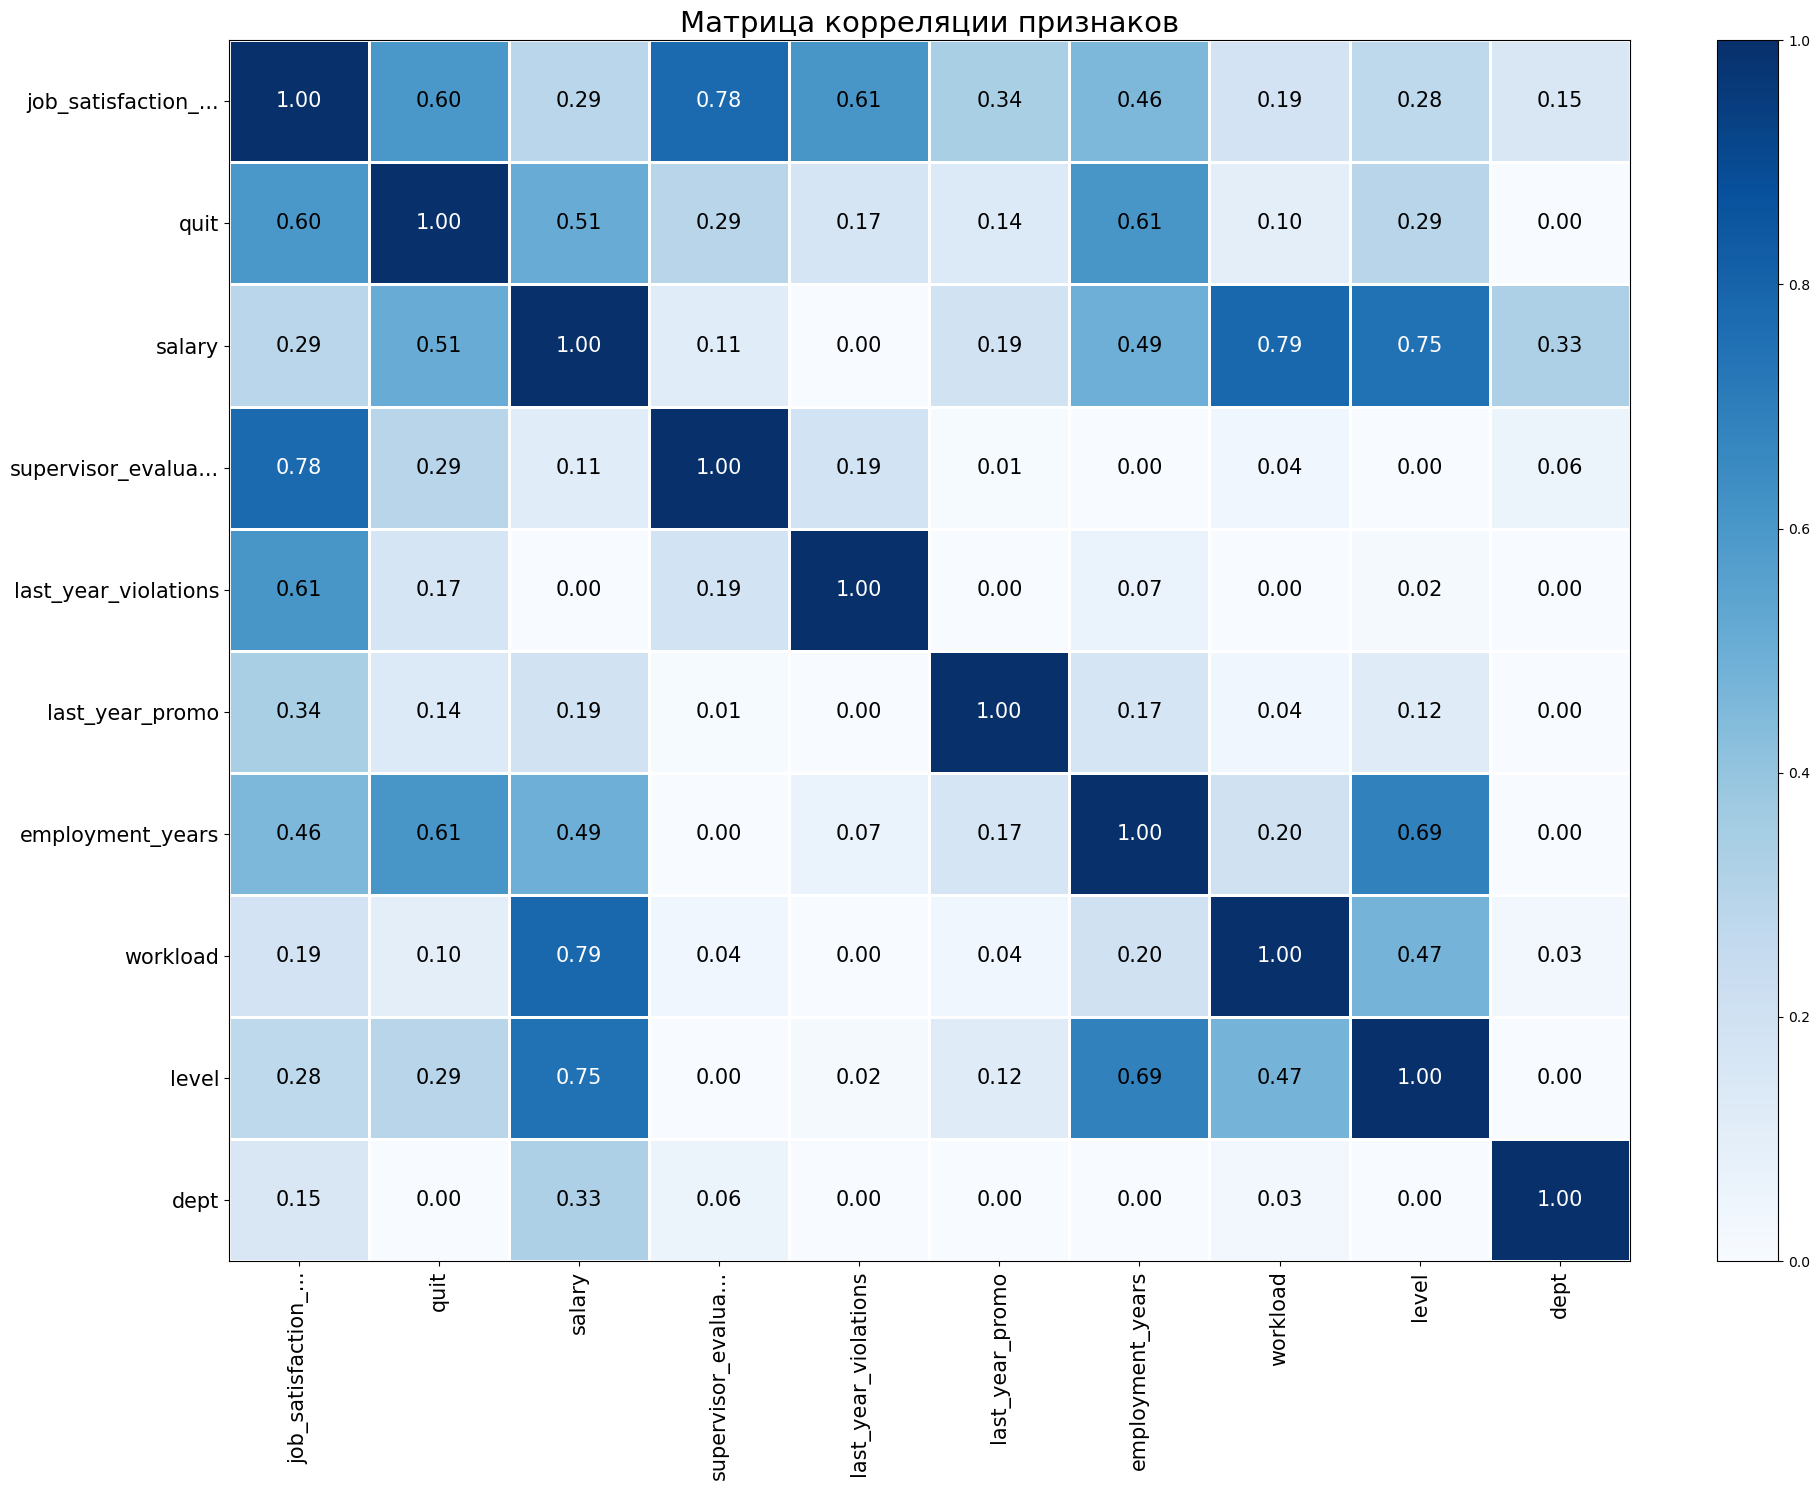

In [66]:
# Построение матрицы корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Blues',
    title='Мaтрица корреляции признаков',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

**Вывод по корреляционному анализу**

Целевой признак quit больше всего коррелирует с employment_years (0.61), job_satisfaction_rate (0.61) и salary (0.51). Далее идут level (0.29), supervisor_evaluation (0.29) и last_year_violations (0.17). В целом, все выглядит более менее логично.

Есть высока корреляция между входными признаками:
- salary сильно коррелирует с workload и level (0.79 и 0.75 соответсвенно), мультиколлинеарности все равно не наблюдается.
- level сильно коррелирует с employment_years (0.69), мультиколлинеарность отсутствует. 
- job_satisfaction_rate сильно коррелирует с supervisor_evaluation (0.77), мультиколлинеарность отсутсвует.

#### Вывод

Добавили в тренировочные и тестовые данные job_satisfaction_rate, как предсказания первой модели , корреляция между целевым признаком quit и job_satisfaction_rate составляет 0.61. 

Изменили целевой признак на бинарный.

**Вывод по корреляционному анализу**

Целевой признак quit больше всего коррелирует с employment_years (0.61), job_satisfaction_rate (0.61) и salary (0.51). Далее идут level (0.29), supervisor_evaluation (0.29) и last_year_violations (0.17). В целом, все выглядит более менее логично.

Есть высока корреляция между входными признаками:
- salary сильно коррелирует с workload и level (0.79 и 0.75 соответсвенно), мультиколлинеарности все равно не наблюдается.
- level сильно коррелирует с employment_years (0.69), мультиколлинеарность отсутствует. 
- job_satisfaction_rate сильно коррелирует с supervisor_evaluation (0.77), мультиколлинеарность отсутсвует.

### Подготовка данных
<a id='section_2.5'></a>

#### Подготовка тренировочных и тестовых данных

In [67]:
train_data_2.set_index('id', inplace=True)
test_data_2.set_index('id', inplace=True)

In [68]:
X_train_2 = train_data_2.drop('quit', axis=1)
y_train_2 = train_data_2['quit']

X_test_2 = test_data_2.drop('quit', axis=1)
y_test_2 = test_data_2['quit']

In [69]:
print('\nX_train_2:')
display(X_train_2.head())
print('\ny_train_2:')
display(y_train_2.head())
print('\nX_test_2:')
display(X_test_2.head())
print('\ny_test_2:')
display(y_test_2.head())


X_train_2:


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,0.648000
814010,sales,junior,medium,2,no,no,4,27600,0.826111
155091,purchasing,middle,medium,5,no,no,1,37200,0.340000
257132,sales,junior,medium,2,no,yes,3,24000,0.340000
910140,marketing,junior,medium,2,no,no,5,25200,0.690000



y_train_2:


id
723290    0
814010    0
155091    0
257132    1
910140    0
Name: quit, dtype: int64


X_test_2:


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.883333
686555,hr,junior,medium,1,no,no,4,30000,0.682222
467458,sales,middle,low,5,no,no,4,19200,0.660000
418655,sales,middle,low,6,no,no,4,19200,0.666000
789145,hr,middle,medium,5,no,no,5,40800,0.825556



y_test_2:


id
485046    0
686555    0
467458    0
418655    0
789145    0
Name: quit, dtype: int64

#### Вывод

На данном этапе были подгототвлены 4 датасета (X_train_2, y_train_2, X_test_2, y_test_2)

Подготовка данных будет происходить внутри пайплайна:

- dept, last_year_promo, last_year_violations - будут кодироваться с помощью OneHotEncoder.
- level, workload - будут кодироваться с помощью OrdinalEncoder.
- employment_years, supervisor_evaluation, salary, job_satisfaction_rate - будут масштибироваться с помощью StandardScaler, MinMaxScaler, RobustScaler, а так же в пайплайне будут перебираться варианты без масштабирования данных.

### Обучение моделей 
<a id='section_2.6'></a>

#### Пайплайн

In [70]:
RANDOM_STATE = 5

# Столбцы для OneHotEncoder()
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']

# Столбцы для OrdinalEncoder()
ord_columns = ['level', 'workload']

#Столбцы для масштабирования
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

# Пайплайн OneHotEncoder()
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
)

# Пайплайн OrdinalEncoder()
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['low', 'medium', 'high'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

# Пайплайн полной подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num',  StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# Итоговый пайплайн
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', KNeighborsClassifier())
    ]
)

In [71]:
# Словарь для перебора моделей и гиперпараметров к ним

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 30),
        'models__max_features': range(2, 30),
        'models__min_samples_split': range(2, 30),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']   
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, kernel='poly', probability=True)],
        'models__degree': range(2, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            penalty='l1',
            solver='liblinear'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]

In [72]:
pipe_final

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_befor...
                                                                   OrdinalEncoder(categories=[['junior',
                                                                                               'middle',
                                                                                               'sinior'],
                                                                                              ['low',
                                                                                               'medium',
                                                                                               'high']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload']),
                                                 ('num', StandardScaler(),
                                                  ['employment_years',
                                                   'supervisor_evaluation',
                                                   'salary',
                                                   'job_satisfaction_rate'])])),
                ('models', KNeighborsClassifier())])

#### Подбор модели

In [73]:
# Рандомный поиск наиболее качетвенных моделей и параметров к ним
grid = RandomizedSearchCV(
    pipe_final, 
    param_grid,
    n_iter=30,
    cv=5, 
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs = -1
)
search = grid.fit(X_train_2, y_train_2)

In [74]:
best_model = search.best_estimator_

print('Лучшая модель:')

display(best_model['models'])

print('Метод масштабирования лучшей модели:')

display(search.best_params_['preprocessor__num'])

Лучшая модель:


DecisionTreeClassifier(max_depth=8, max_features=16, min_samples_split=21,
                       random_state=5)

Метод масштабирования лучшей модели:


'passthrough'

In [75]:
res_2 = pd.DataFrame(search.cv_results_)
res_2[['rank_test_score', 'mean_test_score', 'param_models']].sort_values(by='rank_test_score', ascending=True).head(10)

,rank_test_score,mean_test_score,param_models
2,1,0.926652,DecisionTreeClassifier(random_state=5)
24,2,0.926077,DecisionTreeClassifier(random_state=5)
13,3,0.925808,DecisionTreeClassifier(random_state=5)
1,4,0.925341,DecisionTreeClassifier(random_state=5)
4,5,0.925234,DecisionTreeClassifier(random_state=5)
26,6,0.924952,DecisionTreeClassifier(random_state=5)
17,7,0.923769,DecisionTreeClassifier(random_state=5)
5,8,0.923424,DecisionTreeClassifier(random_state=5)
14,9,0.923212,DecisionTreeClassifier(random_state=5)
25,10,0.923145,DecisionTreeClassifier(random_state=5)


In [76]:
# Функция для расчета roc_auc для тренировочной и тестовой выборок
def cvs_roc_auc_train_test(model, X_test, y_test, search):

    roc_auc_on_train = search.best_score_
    roc_auc_on_test = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])                       
                                                   
    print(f'Метрика roc_auc для тренировочной выборки: {round(roc_auc_on_train, 3)}',
          f'Метрика roc_auc для тестовой выборки: {round(roc_auc_on_test, 3)}', sep='\n')

In [77]:
cvs_roc_auc_train_test(best_model, X_test_2, y_test_2, search)

Метрика roc_auc для тренировочной выборки: 0.927
Метрика roc_auc для тестовой выборки: 0.919


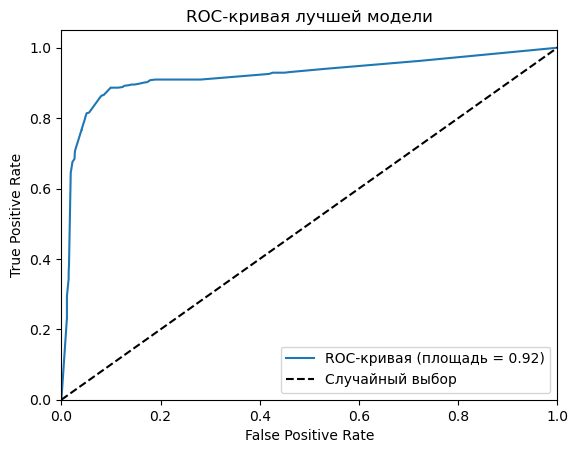

In [81]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_2, best_model.predict_proba(X_test_2)[:, 1]) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC-кривая (площадь = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Случайный выбор')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая лучшей модели')
plt.legend()
plt.show()

#### Вывод

На данном этапе был создан пайплайн, который вмещает в себя этам предобработки данных и этап обучения модели.

1. На этапе предобработки сначала кодируются категориальные признаки с помощью OneHotEncoder, потом категориальные порядковые признаки с помощью OrdinalEncoder, затем происходит масштабирование колличественых данных с помощью StandrdScaler, MinMaxScaler, RobustScaler или пропуск масштабирования (passthrough) (происходит перебор).
2. На этапе обучения модели перебираются DecisionTreeClassifier, KNeighborsClassifier, SVC и LogisticRegression, так же в каждой модели перебираются некоторыет гиперпараметры.

В итоге была найдена и обучена модель для определения уровня удовлетворенности сотрудника работой. Лучшей по метрике ROC-AUC оказалась DecisionTreeClassifier(max_depth=8, max_features=16, min_samples_split=21, random_state=5) с пропуском этапа масштабирования данных (passthrough).

- Метрика ROC-AUC лучшей модели для тренировочной выборки: 0.927.

- Метрика SMAPE лучшей модели для тестовой выборки: 0.914.

По техническому заданию: ROC-AUC >= 0.91 на тестовой выборке. Условие выполняется, значит задача решена.

### Вывод по второй задаче

#### Интерпертация модели

In [ ]:
# Предобработанные входные данные
X_train_preprocessed_2 = best_model['preprocessor'].fit_transform(X_train_2)
X_test_preprocessed_2 = best_model['preprocessor'].transform(X_test_2)

# Создание Explainer
explaner = shap.Explainer(best_model['models'], X_train_preprocessed_2)

# Добавление названий столбцов, для более понятных графиков
feature_names_2 = best_model['preprocessor'].get_feature_names_out()
X_test_preprocessed_2 = pd.DataFrame(X_test_preprocessed_2, columns=feature_names_2)

# Нахождение значений Шэпли
shap_values_2 = explaner(X_test_preprocessed_2, check_additivity=False)[:, :, 1]

#Построение графиков
shap.plots.beeswarm(shap_values_2, max_display=30)
shap.plots.bar(shap_values_2, max_display=30)

#### Вывод

Лучшей моделью для решения поставленной задачи по метрике ROC-AUC, а именно "Предсказание увольнения сотрудника из компании", оказалась модель DecisionTreeClassifier(max_depth=8, max_features=16, min_samples_split=21, random_state=5) с пропуском этапа масштабирования данных (passthrough).

Наиболее сильно влияющими на модель признакми оказались (список идет в порядке убывания важности):

1. level: Чем выше должность, теме реже сотрудники увольняются.
2. employment_years: Чем больше сотрудник работает в компании, тем меньше вероятность его ухода, звучит логично.
3. job_satisfaction_rate: Чем выше удовлетворенность, тем меньше вероятность ухода, логично...
4. workload: Тут не такая явная связь, как в первых трех пунктах, однако тенденция есть, а именно: чем больше загруженность сотрудника, тем ниже вероятность его ухода.
5. salary: Однозначно сказать, с какой (низкой или высокой) зарплатой уходят чаще, не так просто. Однако люди с высокой зарплатой чуть реже уходят.
6. supervisor_evaluation: чем выше оценка руководителя, тем меньше вероятность ухода.

Все остальные признаки уже имеют весьма слабое влияние, однако стоит отметить, что люди работающие в отделе purchasing, чаще ухолят. Также сотрудники, у которых было повышение в последний год не увольняются, что в целом логично.

## Общий вывод

Описание проекта:

 HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.
Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 

Задачи:
1. Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.
2. Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

Задача №1:

Описание данных:

Мы имеем 3 файла (датафрейма):

1. train_job_satisfaction_rate.csv - тренировочные данные (X_train + y_train).

2. test_features.csv - входные данные для тестов (X_test).

3. test_target_job_satisfaction_rate.csv - целевой признак тестовой выборки (y_test).

Признаки:

- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

Задача №2:

Описание данных:

1. train_quit.csv - тренировочные данные (X_train + y_train).
2. test_features.csv - входные данные для тестов (X_test).
3. test_target_quit.csv - целевой признак тестовой выборки (y_test).

Признаки:

- quit - увольнение сотрудника из компании

**Задача №1**

**Загрузка данных**

Загрузили три датафрейма:

1. train_data_1 (train_job_satisfaction_rate.csv): имеются пропуски в debt и level (6 и 4 пропуска соответсвенно).

2. X_test_1 (test_features.csv): имеются пропуски в debt и level (2 и 1 пропуска соответсвенно).

3. y_test_1 (test_target_job_satisfaction_rate.csv): пропусков нет.

Типы данных во всех датафреймах в порядке.

Категориальные данные: id, dept, level, workload, last_year_promo, last_year_violations, supervisor_evaluation.

Колличесвенные данные: employment_years, salary, job_satisfaction_rate.

**Предобработка данных**

Были устраненены пропуски в данных (просто пробел) в столбцах dept и workload на np.nan в X_test_1.

В будущем значения nan будут заменять с помощью SimpleImputer на этапе подготовки данных внутри пайплайна.

**Исследовательский анализ**

Категориальные данные:

- dept: Наиболее популярный отдел sales (38%), потом идет technology (22%), далее purchasing (14,5%), marketing (14%), hr (11%).
- level: Больше всего junior (48%), чуть меньше middle (42%) и еще примерно 10% senior. Выглядит правдоподобно.
- workload: Больше всего средней загрузки (50%), далее идут низкая и высокая загрузки (30% и 18% соответсвенно).
- last_year_promo: Тлько 3% повышений за прошедший год.
- last_year_violations: 14% сотрудников нарушали трудовой договор за последний год.
- supervisor_evaluation: Больше всего 4ок в оценках качетва работы сотрудников (41%), далее 3ка (30%) и оставшиеся 30% распределены между 5ой 2ой и 1ей (именно в таком порядке процентного соотношения).

Дисбаланс классов отсутсвует и это не может не радовать.

Колличетсвенные данные:

- employment_years: Распределение выглядит правдоподобно, больше всего у нас сотрудников, которые работают 3 года.
- salary: Распределение выглядит правдоподобно, среднее значние ЗП составляет 34 тыс, медианное 30 тыс, есть группа очень высоких зарплат, выбивающиеся из общей массы, это не выбросы.
- job_satisfaction_rate: Целевой признак. В среднем соотрудники удовлетворены работой в компании примерно на 55%.

Дисбалланс классов отсутвует.

Корреляционный анализ:

Целевой признак job_satisfaction_rate больше всего коррелирует с supervisor_evaluation (0.77) и с last_year_violations (0.56). Далее идут employment_years (0.33), last_year_promo (0.24) и только потом идет salary (0.15). Интересный результат, интуитивно казалось, что самым важным критерием в удовлетворенности сотрудника работой является зарплата, однако самыми важными признаками оказались оценка работы сотрудника его руководителем и нарушение трудового договора сотрудником.

Есть высока корреляция между входными признаками:
- salary сильно коррелирует с workload и level (0.79 и 0.73 соответсвенно), мультиколлинеарности все равно не наблюдается.
- level сильно коррелирует с employment_years (0.69), мультиколлинеарность отсутствует.

**Подготовка данных**

На данном этапе были подгототвлены 4 датасета (X_train_1, y_train_1, X_test_1, y_test_1)

Подготовка данных будет происходить внутри пайплайна:

- dept, last_year_promo, last_year_violations - будут кодироваться с помощью OneHotEncoder.
- level, workload - будут кодироваться с помощью OrdinalEncoder.
- employment_years, supervisor_evaluation, salary - будут масштибироваться с помощью StandardScaler, MinMaxScaler, RobustScaler, а так же в пайплайне будет перебираться варианты без масштабирования данных.

**Обучение модели**

На данном этапе был создан пайплайн, который вмещает в себя этам предобработки данных и этап обучения модели.

1. На этапе предобработки сначала кодируются категориальные признаки с помощью OneHotEncoder, потом категориальные порядковые признаки с помощью OrdinalEncoder, затем происходит масштабирование колличественых данных с помощью StandrdScaler, MinMaxScaler или RobustScaler (происходит перебор).
2. На этапе обучения модели перебираются DecisionTreeRegressor, LinearRegression, так же в каждой модели перебираются некоторыет гиперпараметры.

В итоге была найдена и обучена модель для определения уровня удовлетворенности сотрудника работой. Лучшей по метрике SMAPE оказалась DecisionTreeRegressor(max_depth=22, max_features=24, min_samples_split=12, random_state=5) с масштабированием данных с помощью 'passthrough'.

- Метрика SMAPE лучшей модели для тренировочной выборки: -14.73.

- Метрика SMAPE лучшей модели для тестовой выборки: 13.659.

По техническому заданию: SMAPE <= 15 на тестовой выборке. Условие выполняется, значит задача решена.

**Вывод по первой задаче**

Лучшей моделью для решения поставленной задачи по метрике SMAPE, а именно "Предсказание уровня удовлетворенности сотрудника", оказалась модель DecisionTreeRegressor(max_depth=14, max_features=19, min_samples_split=6, random_state=5) с масштабированием данных с помощью RobustScaler().

Наиболее сильно влияющми на модель признакми оказались (список идет в порядке убывания важности):

1. supervisor_evaluation: Чем выше руководитель оценивает работу сотрудника, тем выше удовлетворенность сотрудника, интерестно, что это самый выжный признак...
2. employment_years: Чем больше сотрудник работает в компании, тем выше его удовлетворенность, звучит логично, вряд ли человек захочет долго работать в месте, где ему не нравится.
3. level: Чем ниже уровень занимаемой должности, тем больше сотрудник удовлетворен работой, забавно :D.
4. salary: Чем выше зарплата, тем больше удовлетворенность, тут все логично.
5. last_year_violation: отсутсвие нарушение не сильно влияет на целевоц признак, однако наличие нарушений сильно влияет в негативную сторону на удовлетворенность сотрудника.
6. workload: Чем меньше загруженность, тем выше удовлетворенность. Звучит здраво, никто не любит перерабатывать.

Все остальные признаки уже имеют весьма слабое влияние, однако стоит отметить, что люди работающие в отделе technology, чаще имеют низкую удовлетворенность, в отделе purchasing все диаметрано наоборот. Также сотрудники, у которых было повышение в последний год имеют более высокую удовлетворенность, что в целом логично.

**Задача №2**

**Загрузка данных**

Загрузили три датафрейма:

1. train_data_1 (train_job_satisfaction_rate.csv): пропусков нет.

2. X_test_1 (test_features.csv): имеются пропуски в debt и level (2 и 1 пропуска соответсвенно).

3. y_test_1 (test_target_job_satisfaction_rate.csv): пропусков нет.

Типы данных во всех датафреймах в порядке.

Категориальные данные: id, dept, level, workload, last_year_promo, last_year_violations, supervisor_evaluation, quit.

Колличесвенные данные: employment_years, salary.

**Предобработка данных**

Были устраненены пропуски в данных (просто пробел) в столбцах dept и workload на np.nan в X_test_2.

В будущем значения nan будут заменять с помощью SimpleImputer на этапе подготовки данных внутри пайплайна.

**Исследовательский анализ**

Категориальный данные:

- dept: Наиболее популярный отдел sales (37%), потом идет technology (23%), далее purchasing (14%) и marketing (14%), hr (11%).
- level: Больше всего junior (48%), чуть меньше middle (42%) и еще примерно 9% senior. Выглядит правдоподобно.
- workload: Больше всего средней загрузки (52%), далее идут низкая и высокая загрузки (30% и 18% соответсвенно).
- last_year_promo: Только 3% повышений за прошедший год.
- last_year_violations: 13% сотрудников нарушали трудовой договор за последний год.
- supervisor_evaluation: Больше всего 4ок в оценках качетва работы сотрудников (42%), далее 3ка (30%) и оставшиеся 30% распределены между 5ой 2ой и 1ей (именно в таком порядке процентного соотношения).
- quit: Почти 30% сотрудников в датафреймах уволилось.

Дисбаланс классов отсутсвует и это не может не радовать.

Колличественный данные:

- employment_years: Распределение выглядит правдоподобно, больше всего у нас сотрудников, которые работают 3 года.
- salary: Распределение выглядит правдоподобно, среднее значние ЗП составляет 34 тыс, медианное 30 тыс, есть группа очень высоких зарплат, выбивающиеся из общей массы, это не выбросы.

Дисбалланс классов отсутвует.

Связи между удовлетворенностью сотрудников и их увольнениями:

Связь между удовлетворенностью и увольнениями явно присутсвует. Поэтому в модели, предсказывающей увольнения, будем использовать ноывй признак: job_satisfaction_rate.

Портрет уволившегося сотрудника:

1. Имеет низкую удовлетворенность (меньше 50%)
2. Отдел почти не влияет, немного чаще увольняются из отделов sales и technology (разница всего в 1% относительно оставшихся). Можно сказать, что влияние данного признака стремится к нулю.
3. Обычно увольняются сотрудники, работающие на позиции junior.
4. Низкая рабочая нагрузка.
5. В прошедший год не было повышений.
6. Чаще нарушает трудовой договор.
7. Оценка руководителя чаще будет меньше или равна 3ем, в 25% случаев увольняются и люди с оценкой 4. С 5ой увольняются крайне редко.
8. Недавно работает (до 2ух лет).
9. Зарплата до 30 тыс, в более редких случаях до 40 тыс.

**Добавление нового признака**

Добавили в тренировочные и тестовые данные job_satisfaction_rate, как предсказания первой модели , корреляция между целевым признаком quit и job_satisfaction_rate составляет 0.61. 

Изменили целевой признак на бинарный.

**Вывод по корреляционному анализу**

Целевой признак quit больше всего коррелирует с employment_years (0.61), job_satisfaction_rate (0.61) и salary (0.51). Далее идут level (0.29), supervisor_evaluation (0.29) и last_year_violations (0.17). В целом, все выглядит более менее логично.

Есть высока корреляция между входными признаками:
- salary сильно коррелирует с workload и level (0.79 и 0.75 соответсвенно), мультиколлинеарности все равно не наблюдается.
- level сильно коррелирует с employment_years (0.69), мультиколлинеарность отсутствует. 
- job_satisfaction_rate сильно коррелирует с supervisor_evaluation (0.77), мультиколлинеарность отсутсвует.

**Подготовка данных**

На данном этапе были подгототвлены 4 датасета (X_train_2, y_train_2, X_test_2, y_test_2)

Подготовка данных будет происходить внутри пайплайна:

- dept, last_year_promo, last_year_violations - будут кодироваться с помощью OneHotEncoder.
- level, workload - будут кодироваться с помощью OrdinalEncoder.
- employment_years, supervisor_evaluation, salary, job_satisfaction_rate - будут масштибироваться с помощью StandardScaler, MinMaxScaler, RobustScaler, а так же в пайплайне будут перебираться варианты без масштабирования данных.

**Обучение моделей**

На данном этапе был создан пайплайн, который вмещает в себя этам предобработки данных и этап обучения модели.

1. На этапе предобработки сначала кодируются категориальные признаки с помощью OneHotEncoder, потом категориальные порядковые признаки с помощью OrdinalEncoder, затем происходит масштабирование колличественых данных с помощью StandrdScaler, MinMaxScaler, RobustScaler или пропуск масштабирования (passthrough) (происходит перебор).
2. На этапе обучения модели перебираются DecisionTreeClassifier, KNeighborsClassifier, SVC и LogisticRegression, так же в каждой модели перебираются некоторыет гиперпараметры.

В итоге была найдена и обучена модель для определения уровня удовлетворенности сотрудника работой. Лучшей по метрике ROC-AUC оказалась DecisionTreeClassifier(max_depth=8, max_features=16, min_samples_split=21, random_state=5) с пропуском этапа масштабирования данных (passthrough).

- Метрика ROC-AUC лучшей модели для тренировочной выборки: 0.927.

- Метрика SMAPE лучшей модели для тестовой выборки: 0.914.

По техническому заданию: ROC-AUC >= 0.91 на тестовой выборке. Условие выполняется, значит задача решена.

**Вывод по второй задаче**

Лучшей моделью для решения поставленной задачи по метрике ROC-AUC, а именно "Предсказание увольнения сотрудника из компании", оказалась модель DecisionTreeClassifier(max_depth=8, max_features=16, min_samples_split=21, random_state=5) с пропуском этапа масштабирования данных (passthrough).

Наиболее сильно влияющими на модель признакми оказались (список идет в порядке убывания важности):

1. level: Чем выше должность, тем реже сотрудники увольняются.
2. employment_years: Чем больше сотрудник работает в компании, тем меньше вероятность его ухода, звучит логично.
3. job_satisfaction_rate: Чем выше удовлетворенность, тем меньше вероятность ухода, логично...
4. workload: Тут не такая явная связь, как в первых трех пунктах, однако тенденция есть, а именно: чем больше загруженность сотрудника, тем ниже вероятность его ухода.
5. salary: Однозначно сказать, с какой (низкой или высокой) зарплатой уходят чаще, не так просто. Однако люди с высокой зарплатой чуть реже уходят.
6. supervisor_evaluation: чем выше оценка руководителя, тем меньше вероятность ухода.

Все остальные признаки уже имеют весьма слабое влияние, однако стоит отметить, что люди работающие в отделе purchasing, чаще уходят. Также сотрудники, у которых было повышение в последний год не увольняются, что в целом логично.

**Рекомендации по итогам работа**

В целом, часто увольняются люди, работающие меньше 2ух лет на низких должностях. Сильнее всего на увольнения влияет (из признаков, на которые можно повлиять) - удовлетворенность. Самый логичный шаг - это повышение зарплат, стараться делать так, чтобы зарплаты были немного выше рыночных, так у человека будет значительно меньше стимула уходить. Так же (это уже работа руководителей) нужно больше уделять времени новым сотрудникам, т.к. это самые часто уходящие люди и дело не только в зарплате. С  новичками очень важно общаться и сопровождать их на начальных этапах, чтобы процесс осваивания проходил быстрее и человеку было интереснее работать. Это очень банальные выводы, однако они прямо вытекают из данных.